# Set Up

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount = True)
folder = '/content/gdrive/My Drive/Data Visualization'

Mounted at /content/gdrive


In [ ]:
#install
!pip install country_converter

In [ ]:
pip install statsmodels

In [ ]:
#Các thư viện
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud
import country_converter as coco
import scipy as sp
from scipy.stats import chi2_contingency, gaussian_kde
from sklearn.preprocessing import LabelEncoder, StandardScaler
from statsmodels.formula.api     import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import plotly.figure_factory as ff
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import plotly.graph_objects as go
import nltk
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score
import statsmodels.api as sm
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

#styling
%matplotlib inline

# Chương 2. Tổng quan bộ dữ liệu nghiên cứu

## Phân tích khám phá dữ liệu

In [ ]:
# Đọc bộ dữ liệu
df = pd.read_csv(folder + '/Data/salaries.csv')

In [ ]:
# Xem 5 dòng đầu tiên của bộ dữ liệu
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,EX,FT,Data Science Director,212000,USD,212000,US,0,US,M
1,2023,EX,FT,Data Science Director,190000,USD,190000,US,0,US,M
2,2023,MI,FT,Business Intelligence Engineer,35000,GBP,43064,GB,0,GB,M
3,2023,MI,FT,Business Intelligence Engineer,35000,GBP,43064,GB,0,GB,M
4,2023,SE,FT,Machine Learning Engineer,245700,USD,245700,US,0,US,M


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8805 entries, 0 to 8804
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           8805 non-null   int64 
 1   experience_level    8805 non-null   object
 2   employment_type     8805 non-null   object
 3   job_title           8805 non-null   object
 4   salary              8805 non-null   int64 
 5   salary_currency     8805 non-null   object
 6   salary_in_usd       8805 non-null   int64 
 7   employee_residence  8805 non-null   object
 8   remote_ratio        8805 non-null   int64 
 9   company_location    8805 non-null   object
 10  company_size        8805 non-null   object
dtypes: int64(4), object(7)
memory usage: 756.8+ KB


* Bộ dữ liệu bao gồm 8805 dòng, 11 cột. Trong bộ dữ liệu có 7 biến phân loại, 4 biến số.

### Nhận diện các biến


In [ ]:
df.drop(df[['salary','salary_currency']],axis=1, inplace=True)

* Bỏ 2 thuộc tính salary và salary_currency vì đã có thuộc tính salary_in_USD chuyển tiền lương về chung một đơn vị tiền là USD.

In [ ]:
# xem mỗi thuộc tính có bao nhiêu danh mục
print('Số danh mục của mỗi cột:')
print(df.nunique())

Số danh mục của mỗi cột:
work_year                4
experience_level         4
employment_type          4
job_title              124
salary_in_usd         1768
employee_residence      86
remote_ratio             3
company_location        74
company_size             3
dtype: int64


In [ ]:
# Đổi những biến work_year và biến remote_ratio thành biến phân loại
df["work_year"] = df["work_year"].astype(object)
df['remote_ratio_clean']=df['remote_ratio']
df["remote_ratio"].replace([100,50,0], ['No remote work', 'Partially remote' ,'Fully remote'],inplace = True)

# Đổi giá trị của những biến còn lại
df['salary_in_usd'] = df['salary_in_usd'].astype(int)
df["experience_level"].replace(['EN','MI','SE', 'EX'], ['Entry', 'Mid', 'Senior', 'Executive'], inplace = True)
df["employment_type"].replace(["PT", "FT", "CT", "FL"], ["Part-time", "Full-time", "Contract", "Freelance"], inplace=True)
df["company_size"].replace(["S", "M", "L"], ["Small", "Medium", "Large"], inplace=True)

# Chuyển đổi ký hiệu quốc gia thường trú của công ty thành theo mã quốc gia ISO3
converted_country_ = coco.convert(names=df['company_location'], to="ISO3")
df['company_location'] = converted_country_
# Chuyển đổi ký hiệu quốc gia thường trú của nhân viên thành theo mã quốc gia ISO3
converted_country = coco.convert(names=df['employee_residence'], to="ISO3")
df['employee_residence'] = converted_country

* Đổi những thuộc tính  số có ít danh mục thành biến phân loại và đổi giá trị của một số thuộc tính để dễ quan sát trực quan dữ liệu.

## Thống kê dữ liệu

In [ ]:
print('Bộ dữ liệu có: ', df.shape[0],'dòng',df.shape[1],'cột')
print('Các cột dữ liệu:',df.columns)

Bộ dữ liệu có:  8805 dòng 10 cột
Các cột dữ liệu: Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary_in_usd', 'employee_residence', 'remote_ratio',
       'company_location', 'company_size', 'remote_ratio_clean'],
      dtype='object')


In [ ]:
# Xem biến định lượng và định tính
df_numeric = df.select_dtypes(include=[int, float])
df_categorical = df.select_dtypes(include=[object])

print("Các biến số:")
print(','.join(df_numeric.columns))
print("\nCác biến phân loại:")
print(','.join(df_categorical.columns))

Các biến số:
remote_ratio_clean

Các biến phân loại:
work_year,experience_level,employment_type,job_title,employee_residence,remote_ratio,company_location,company_size


In [ ]:
# Thống kê mô tả biến số
df.describe()

,salary_in_usd,remote_ratio_clean
count,8805.000000,8805.000000
mean,149488.265645,38.693924
std,64222.105058,48.068060
min,15000.000000,0.000000
25%,105000.000000,0.000000
50%,142200.000000,0.000000
75%,185900.000000,100.000000
max,615201.000000,100.000000


In [ ]:
# Thống kê mô tả biến phân loại
df.describe(include = 'O')

,work_year,experience_level,employment_type,job_title,employee_residence,remote_ratio,company_location,company_size
count,8805,8805,8805,8805,8805,8805,8805,8805
unique,4,4,4,124,86,3,74,3
top,2023,Senior,Full-time,Data Engineer,USA,Fully remote,USA,Medium
freq,6861,6336,8762,2062,7527,5289,7576,7881


# Chương 3. Tiền xử lý dữ liệu

## I. Phân tích đơn biến - thống kê mô tả

### Cột biến phân loại

In [ ]:
# Lấy tên của các cột phân loại
cat_col = df.select_dtypes(include='object').columns
print(f'Bộ dữ liệu có {len(cat_col)} biến phân loại: {cat_col.values}.')

Bộ dữ liệu có 8 biến phân loại: ['work_year' 'experience_level' 'employment_type' 'job_title'
 'employee_residence' 'remote_ratio' 'company_location' 'company_size'].


In [ ]:
# Xem bảng mô tả của các cột phân loại
df.describe(include = 'O')

,work_year,experience_level,employment_type,job_title,employee_residence,remote_ratio,company_location,company_size
count,8805,8805,8805,8805,8805,8805,8805,8805
unique,4,4,4,124,86,3,74,3
top,2023,Senior,Full-time,Data Engineer,USA,Fully remote,USA,Medium
freq,6861,6336,8762,2062,7527,5289,7576,7881


In [ ]:
# Xem các danh mục trong mỗi cột phân loại
for col in cat_col:
    print(f' - Cột {col} có {df[col].nunique()} danh mục:')
    print(df[col].value_counts())
    print()

 - Cột work_year có 4 danh mục:
2023    6861
2022    1651
2021     218
2020      75
Name: work_year, dtype: int64

 - Cột experience_level có 4 danh mục:
Senior       6336
Mid          1732
Entry         468
Executive     269
Name: experience_level, dtype: int64

 - Cột employment_type có 4 danh mục:
Full-time    8762
Contract       18
Part-time      13
Freelance      12
Name: employment_type, dtype: int64

 - Cột job_title có 124 danh mục:
Data Engineer                     2062
Data Scientist                    1852
Data Analyst                      1322
Machine Learning Engineer          908
Applied Scientist                  258
                                  ... 
Deep Learning Researcher             1
Consultant Data Engineer             1
BI Data Engineer                     1
Managing Director Data Science       1
AWS Data Architect                   1
Name: job_title, Length: 124, dtype: int64

 - Cột employee_residence có 86 danh mục:
USA    7527
GBR     417
CAN     204
ESP 

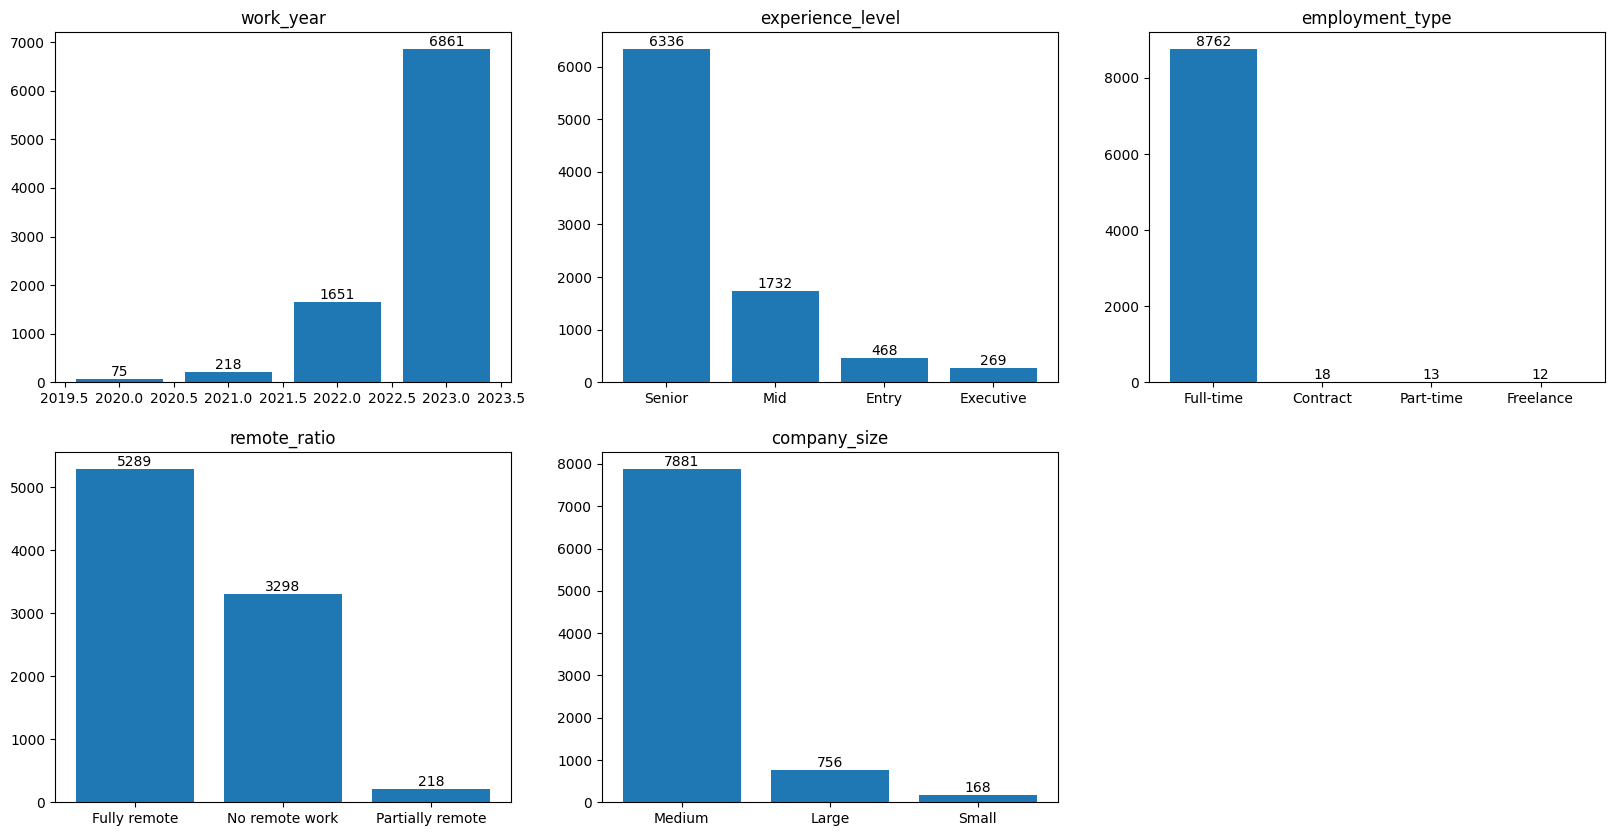

In [ ]:
# Phân tích những biến phân loại có ít danh mục:
# Vẽ biểu đồ bar cho các biến phân loại có ít danh mục
cat_col_less = [col for col in cat_col if df[col].nunique() <= 5]

plt.figure(figsize=([20, 10]))  # Khung (width, height): inch
for i in range(len(cat_col_less)):
    counts = df[cat_col_less[i]].value_counts()
    plt.subplot(2, 3, (i + 1))  # Subplot 1 trong ma trận (2 rows, 3 cols)
    plt.title(cat_col_less[i])
    bars = plt.bar(counts.index, counts.values)

    # Thêm thông số số lượng dữ liệu trên mỗi cột
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.05, round(yval, 2), ha='center', va='bottom')

plt.show()

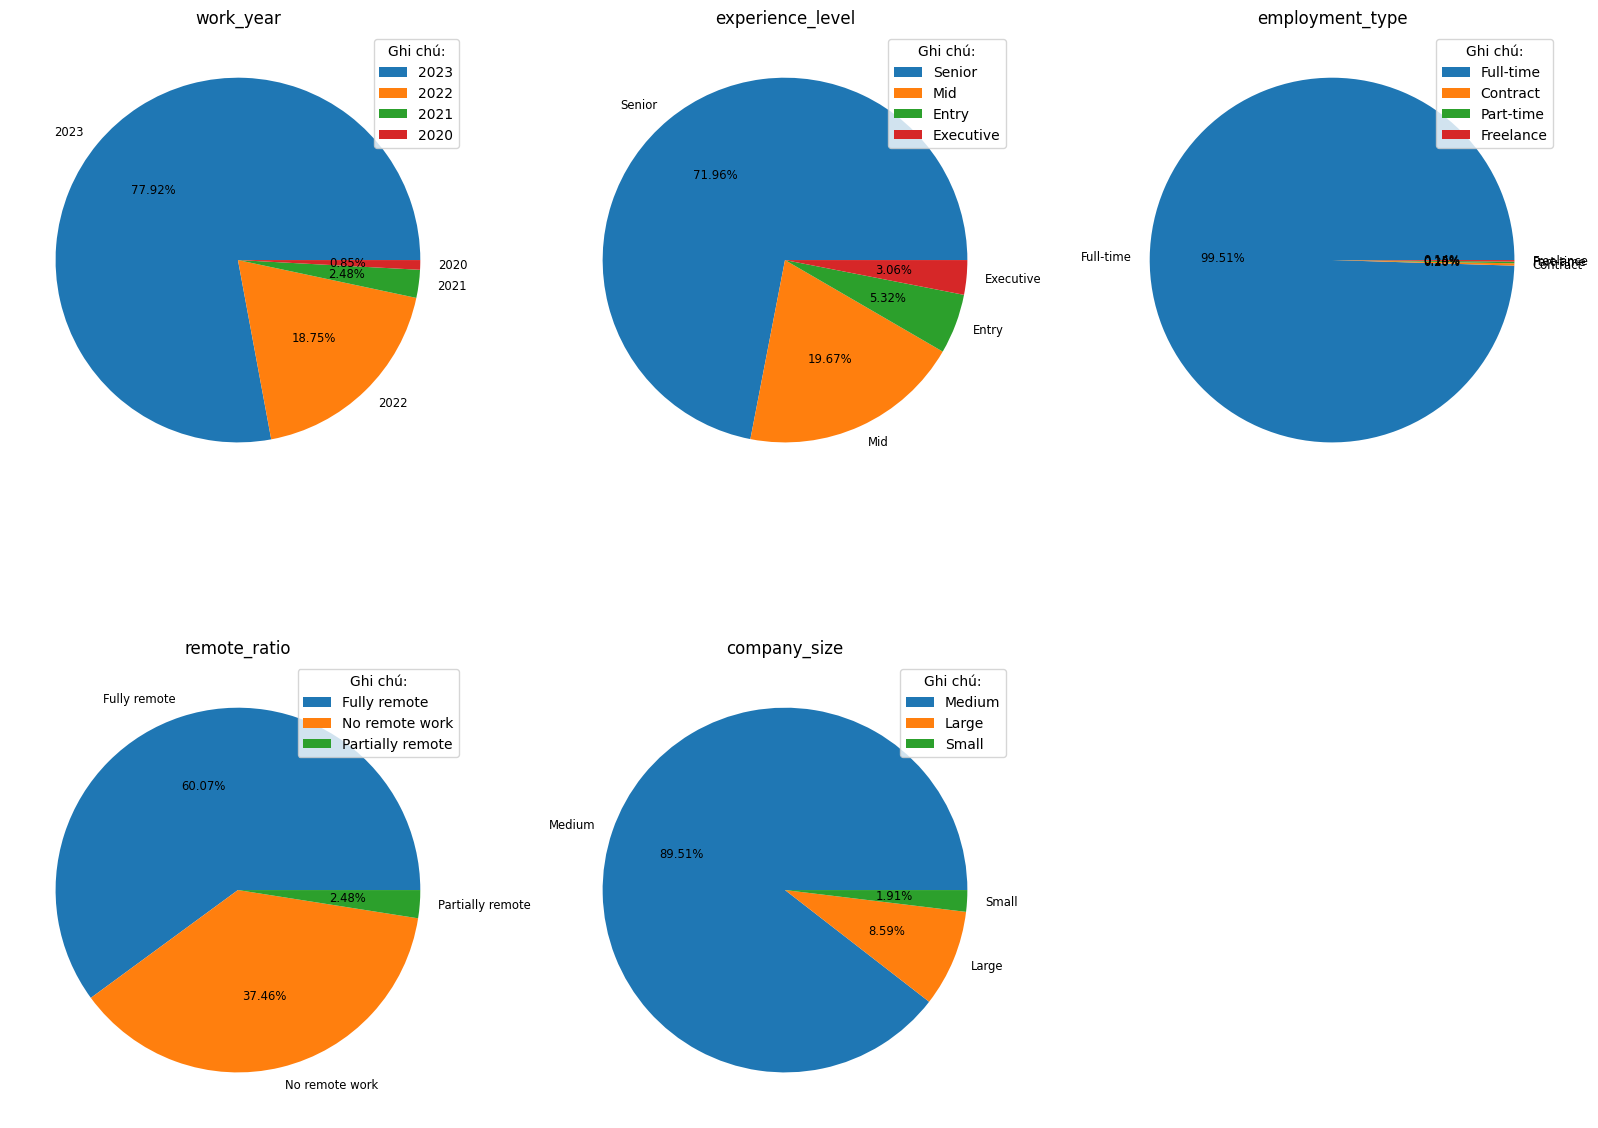

In [ ]:
# Vẽ biểu đồ pie cho các biến phân loại có ít danh mục
plt.figure(figsize = ([20, 15])) # khung (width, height): inch
for i in range(len(cat_col_less)):
    counts = df[cat_col_less[i]].value_counts()
    plt.subplot(2, 3, (i+1)) # subplot 1 trong ma trận (2 rows, 3 cols)
    plt.title(cat_col_less[i])
    plt.pie(counts.values, labels = counts.index, autopct = '%.2f%%', textprops={'size': 'smaller'})
    plt.legend(title = 'Ghi chú:', loc = 1)
plt.show()

* Khi nhìn vào số lượng lương được lấy theo năm, chúng ta có thể thấy rằng năm 2020 chỉ có 75 việc làm trong tập dữ liệu này, năm 2021 tăng lên 218 việc làm, sau đó lên tới 1651 việc làm vào năm 2022 và năm 2023 là hơn 6000 việc làm. việc làm. Số lượng việc làm có xu hướng tăng theo cấp số nhân qua các năm, tăng hơn 7000% kể từ năm 2020. Mức tăng cao nhất giữa các năm là giai đoạn 2021-2022 với mức tăng 655%. Điều này cũng có thể phụ thuộc vào việc lấy dữ liệu không đồng đều giữa các năm.
* Đối với kinh nghiệm làm việc, Senior chiếm phần trăm cao nhất chiếm gần 3/4 bộ dữ liệu. Còn Mid đứng thứ 2 với khoảng 20%. Thấp nhất là Executive, chỉ khoảng 3%. Điều này cũng hợp lý trong thực tế.
* Bỏ thuộc tính employment_type vì có đến 99,51% giá trị là Fulltime. Dữ liệu về các danh mục còn lại rất ít, tổng số lượng các danh mục còn lại chưa đến 1%.
* Với tỷ lệ làm việc từ xa thì làm việc từ xa chiếm phần trăm cao nhất và ít nhất là làm việc từ xa một phần.
* Quy mô công ty phổ biến nhất là quy mô cỡ vừa, quy mô cỡ nhỏ là ít phổ biến nhất.

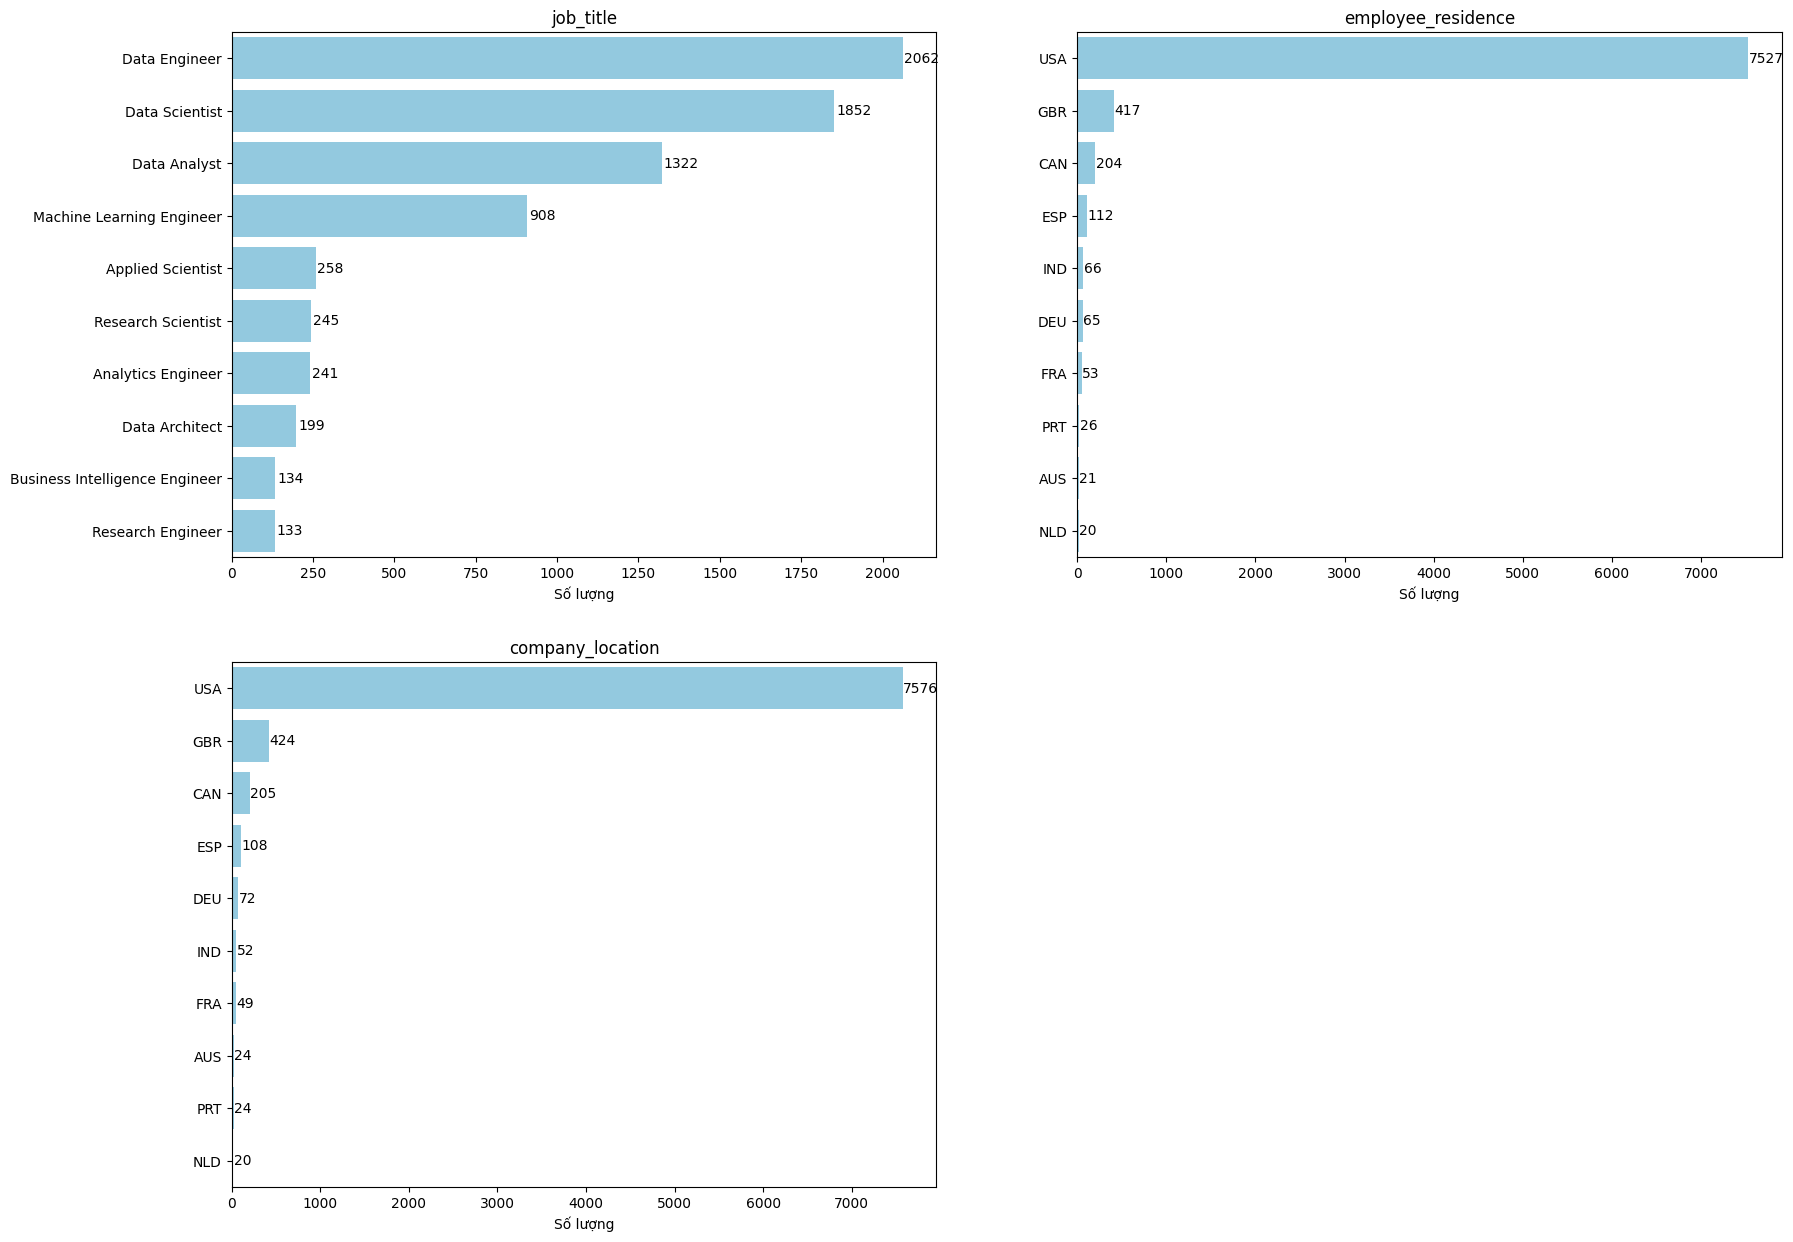

In [ ]:
# Phân tích những biến phân loại có ít danh mục:
# Biểu đồ bar biểu diễn top 10 biến phân loại có nhiều danh mục
cat_col_much = [col for col in cat_col if df[col].nunique() > 5]

plt.figure(figsize=(20, 15))
for i in range(len(cat_col_much)):
    plt.subplot(2, 2, (i+1)) # subplot 1 trong ma trận (2 rows, 3 cols)
    top10 = df[cat_col_much[i]].value_counts()[:10]
    ax = sns.barplot(x=top10.values, y=top10.index,color='skyblue')
    ax.set_xlabel('Số lượng')
    ax.set_title(cat_col_much[i])
    for j, v in enumerate(top10.values):
        ax.annotate(str(v), xy=(v+5,j), va='center')
plt.show()

In [ ]:
# Phân tích thuộc tính job_title
print('Số lượng danh xưng công việc trong bộ dữ liệu là:',df['job_title'].value_counts().size)

Số lượng danh xưng công việc trong bộ dữ liệu là: 124


Có 124 danh xưng công việc trong tập dữ liệu. Data engineer, Data scientist, Data analyst và Machine Learning Engineer là 4 chức danh công việc phổ biến nhất.

Và WordCloud của chức danh công việc được hiển thị như dưới đây:

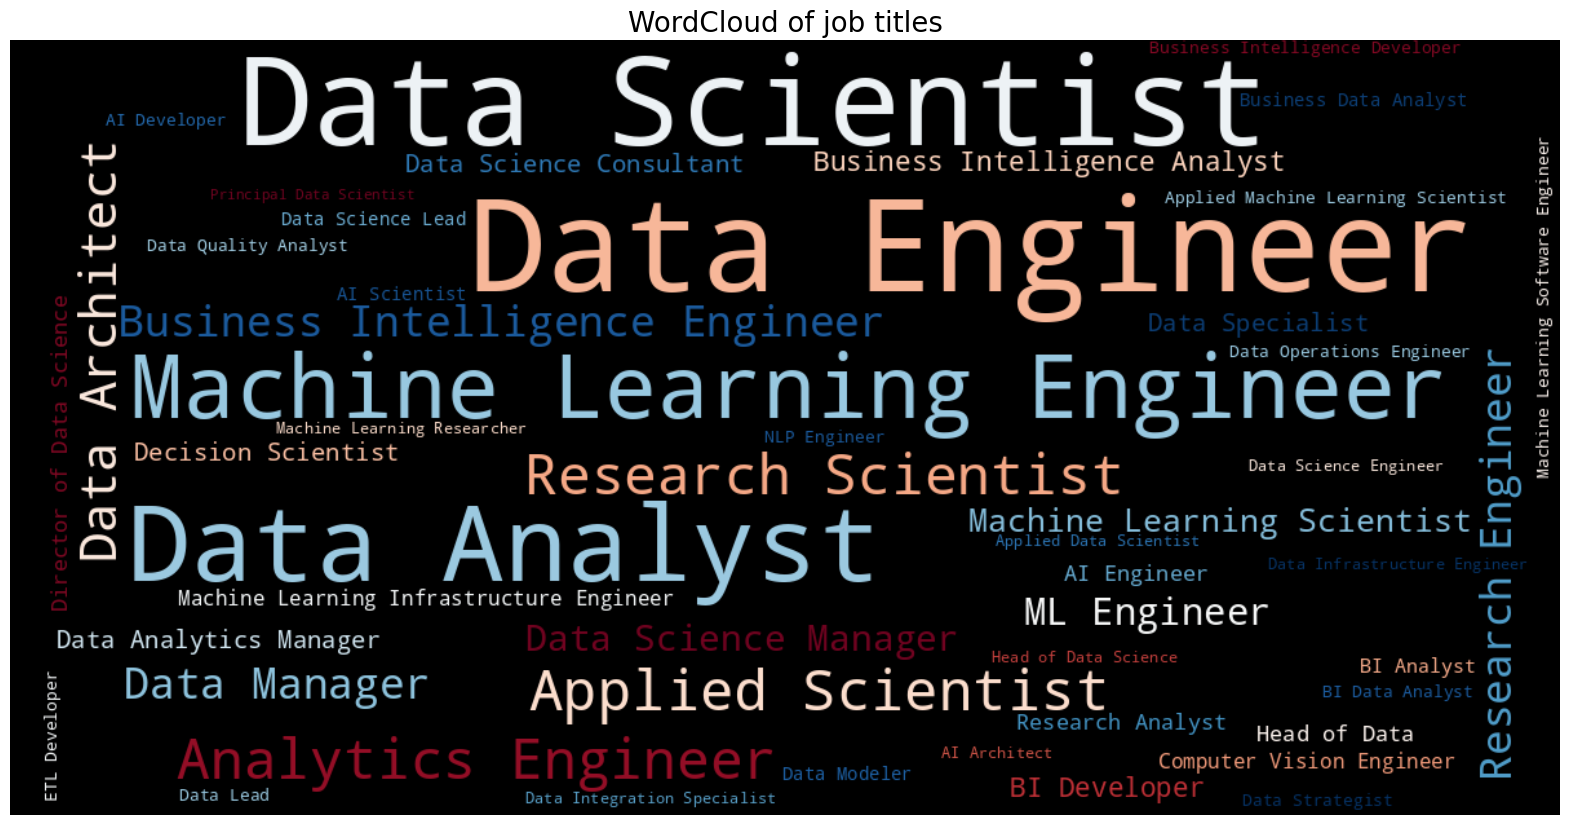

In [ ]:
# Vẽ wordcloud cho các chức danh công việc
def Freq_df(cleanwordlist):
    Freq_dist_nltk = nltk.FreqDist(cleanwordlist)
    df_freq = pd.DataFrame.from_dict(Freq_dist_nltk, orient='index')
    df_freq.columns = ['Frequency']
    df_freq.index.name = 'Term'
    df_freq = df_freq.sort_values(by=['Frequency'],ascending=False)
    df_freq = df_freq.reset_index()
    return df_freq

def Word_Cloud(data, color_background, colormap, title):
    plt.figure(figsize = (20,15))
    wc = WordCloud(width=1200,
               height=600,
               max_words=50,
               colormap= colormap,
               max_font_size = 100,
               random_state=88,
               background_color=color_background).generate_from_frequencies(data)
    plt.imshow(wc, interpolation='bilinear')
    plt.title(title, fontsize=20)
    plt.axis('off')
    plt.show()
freq_df = Freq_df(df['job_title'].values.tolist())
data = dict(zip(freq_df['Term'].tolist(), freq_df['Frequency'].tolist()))
data = freq_df.set_index('Term').to_dict()['Frequency']

Word_Cloud(data ,'black','RdBu', 'WordCloud of job titles')

Có thể dễ dàng nhận thấy rằng những chức danh khác cũng liên quan đến 4 chức danh công việc thường xuyên xảy ra và 4 chức danh này chiếm phần lớn nên tạo cột mới phân các chức danh công việc vào 4 nhóm công việc này và thêm một cột 'other' cho các công việc còn lại.

In [ ]:
# Vì chúng ta có nhiều giá trị trong cột chức danh công việc
# Hãy tạo một hàm để xác định các vai trò được lặp lại nhiều nhất dựa trên từ khóa

def role(title):
    if any(keyword in title.lower() for keyword in ['data scientist', 'data science', 'scientist']):
        return 'Data Scientist'
    elif any(keyword in title.lower() for keyword in ['data analyst', 'analyst']):
        return 'Data Analyst'
    elif any(keyword in title.lower() for keyword in ['data engineer']):
        return 'Data Engineer'
    elif any(keyword in title.lower() for keyword in ['machine learning engineer', 'machine learning', 'ai', 'ml', 'deep learning']):
        return 'Machine Learning Engineer'
    else:
        return 'Other'

In [ ]:
# Tạo cột mới cho các chức danh công việc
df['job_title_clean'] = df['job_title'].apply(role)
df['job_title_clean'].value_counts()

Data Scientist               2752
Data Engineer                2093
Data Analyst                 1528
Other                        1247
Machine Learning Engineer    1185
Name: job_title_clean, dtype: int64

In [ ]:
# Phân tích thuộc tính employee_resdidence
# Vẽ biểu đồ map của Employee Residence
residence = df['employee_residence'].value_counts()
fig = px.choropleth(locations=residence.index,
                    color=residence.values,
                    color_continuous_scale=px.colors.sequential.YlGn,
                    title = 'Biểu đồ map của Employee Residence')

fig.update_layout(font = dict(size= 17, family="Segoe UI"))
fig.show()

In [ ]:
# Phân tích thuộc tính company_location
# Vẽ biểu đồ map của Company Location
companyloca = df['company_location'].value_counts()
fig = px.choropleth(locations=companyloca.index,
                    color=companyloca.values,
                    color_continuous_scale=px.colors.sequential.YlGn,
                    template='seaborn',
                    title = 'Company Location Distribution Map')

fig.update_layout(font = dict(size= 17, family="Franklin Gothic"))
fig.show()

### Cột biến số


In [ ]:
# lấy tên cột số
num_col = df.drop(cat_col, axis=1).columns
num_col

Index(['salary_in_usd', 'remote_ratio_clean', 'job_title_clean'], dtype='object')

* Trong bộ dữ liệu chỉ chứa một cột số là salary_in_usd, 2 cột remote_ratio_clean và job_title_clean thêm vào để sử dụng về sau.

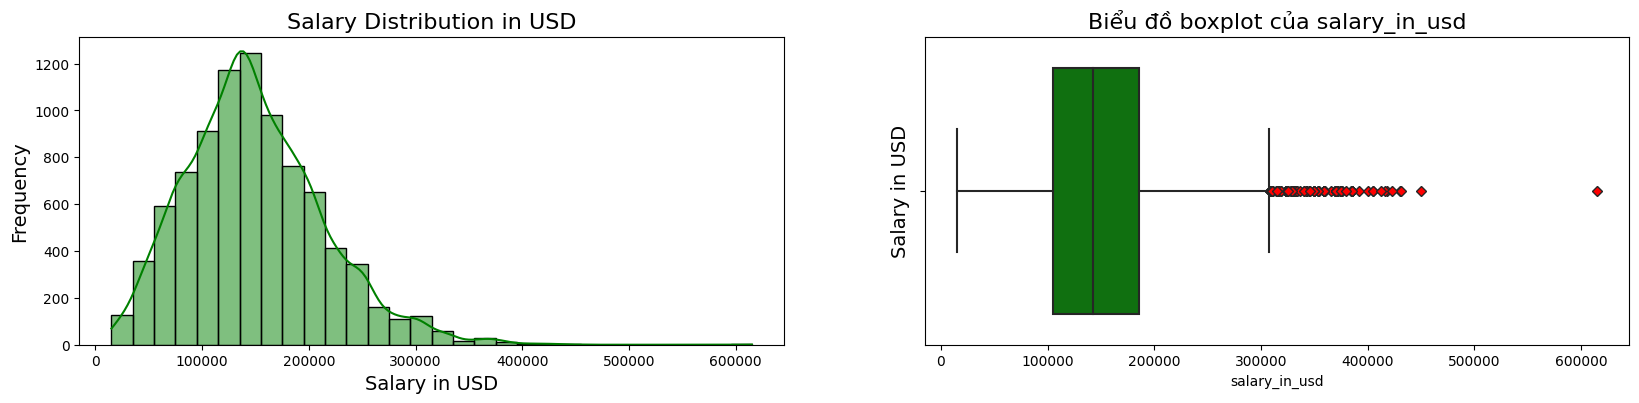

In [ ]:
# Phân tích thuộc tính salary_in_usd
# Tạo biểu đồ phân phối với KDE và box plot
fig, ax = plt.subplots(1, 2, figsize=(20, 4))

sns.histplot(df['salary_in_usd'], bins=30, kde=True, color='green', edgecolor='k', ax=ax[0])

ax[0].set_title('Salary Distribution in USD', fontsize=16)
ax[0].set_xlabel('Salary in USD', fontsize=14)
ax[0].set_ylabel('Frequency', fontsize=14)

outlier = dict(marker = 'D', markerfacecolor = 'r')
sns.boxplot(x=df['salary_in_usd'], color='green',flierprops = outlier, ax=ax[1])

ax[1].set_title('Biểu đồ boxplot của salary_in_usd', fontsize=16)
ax[1].set_ylabel('Salary in USD', fontsize=14)

plt.show()

* Từ biểu đồ bên trái, mức lương phần lớn của các công việc Data Science kể từ năm 2020 đến năm 2023 là khoảng 150 nghìn USD và nó được trải rộng từ mức lương khoảng 15 nghìn USD đến mức lương khoảng 400 nghìn USD.
* Từ biểu đồ bên phải, thấy được thuộc tính salary_in_usd có xuất hiện outliers nên cần phải xử lý outliers.



In [ ]:
# lấy tóm tắt năm số của cột salary_in_usd
df['salary_in_usd'].describe()

count      8805.000000
mean     149488.265645
std       64222.105058
min       15000.000000
25%      105000.000000
50%      142200.000000
75%      185900.000000
max      615201.000000
Name: salary_in_usd, dtype: float64

In [ ]:
#Các đại lượng về xu thế trung tâm
print('Các đại lượng về xu thế trung tâm:')
print("  - Trung bình (Mean):",round(np.mean(df['salary_in_usd']),4))
print('  - Trung vị (Median):',round(np.median(df['salary_in_usd']),4))
print('  - Yếu vị (Mode):',sp.stats.mode(df['salary_in_usd'])[0],'với số lần là',sp.stats.mode(df['salary_in_usd'])[1])

Các đại lượng về xu thế trung tâm:
  - Trung bình (Mean): 149488.2656
  - Trung vị (Median): 142200.0
  - Yếu vị (Mode): 150000 với số lần là 188


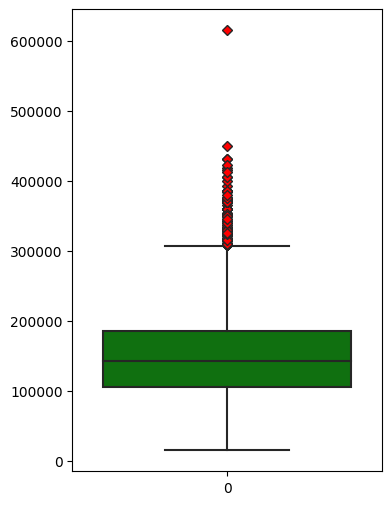


Các đại lượng về độ phân tán:
  - Khoảng biến thiên (Range): 600201
  - Tứ phân vị (Quartile):
     Q1: 105000.0
     Q2: 142200.0
     Q3: 185900.0
  - Khoảng trải giữa (InterQuartile Range): 80900.0
  - Phương sai (Variance): 4124010353.5111
  - Độ lệch chuẩn (Standard Deviation): 64218.458


In [ ]:
plt.figure(figsize = (4, 6))
outlier = dict(marker = 'D', markerfacecolor = 'r')
sns.boxplot(df['salary_in_usd'], flierprops = outlier, color ='green')
plt.show()

## Các đại lượng về độ phân tán
print('\nCác đại lượng về độ phân tán:')

# Khoảng biến thiên (Range)
data_range = np.max(df['salary_in_usd']) - np.min(df['salary_in_usd'])
print("  - Khoảng biến thiên (Range):", data_range)

# Tứ phân vị (Quartile)
q1 = np.percentile(df['salary_in_usd'], 25)
q2 = np.percentile(df['salary_in_usd'], 50)
q3 = np.percentile(df['salary_in_usd'], 75)
print("  - Tứ phân vị (Quartile):")
print("     Q1:", q1)
print("     Q2:", q2)
print("     Q3:", q3)

# Khoảng trải giữa (InterQuartile Range)
iqr = q3 - q1
print("  - Khoảng trải giữa (InterQuartile Range):", iqr)

# Phương sai (Variance)
variance = np.var(df['salary_in_usd'])
print("  - Phương sai (Variance):", round(variance,4))

# Độ lệch chuẩn (Standard deviation)
std_deviation = np.std(df['salary_in_usd'])
print("  - Độ lệch chuẩn (Standard Deviation):", round(std_deviation,4))

* Trong trường hợp này, khoảng biến thiên là 600,201, cho thấy có sự biến động lớn giữa giá trị cao nhất và giá trị thấp nhất.
* IQR thường được sử dụng để đo lường mức độ phân tán của dữ liệu, bỏ qua ảnh hưởng của các giá trị ngoại lai.
* Phương sai ở đây là 4124010353.5111, cho thấy dữ liệu có sự biến động lớn.
* Với độ lệch chuẩn là 64218.458, chứng tỏ rằng dữ liệu có độ phân tán lớn.

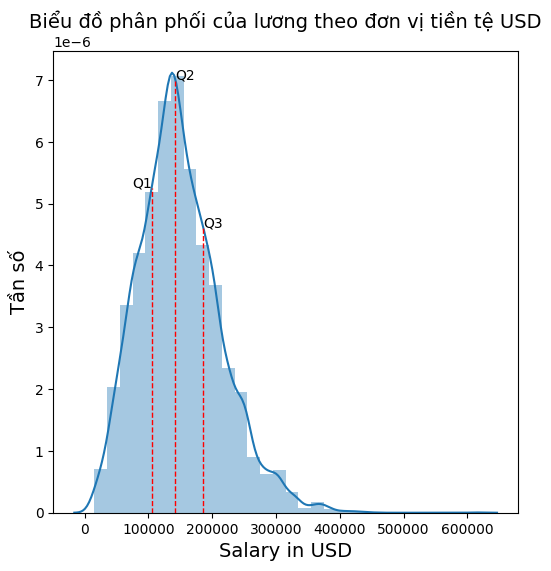


Các đại lượng về hình dáng:
  - Độ nghiêng (skewness): 0.6462
  - Độ nhọn (kurtosis): 0.86


In [ ]:
#Các đại lượng về hình dáng
# Vẽ biểu đồ phân phối
plt.figure(figsize = (6, 6))
sns.distplot(df['salary_in_usd'], bins=30, kde=True, hist = True)
plt.title('Biểu đồ phân phối của lương theo đơn vị tiền tệ USD', fontsize=14)
plt.xlabel('Salary in USD', fontsize=14)
plt.ylabel('Tần số', fontsize=14)
percentiles = np.percentile(df['salary_in_usd'], [25, 50, 75])

# Calculate heights of quartiles as the height of kde at the quartile positions
kde = gaussian_kde(df['salary_in_usd'])
kde_q75 = kde(q3)
kde_q50 = kde(q2)
kde_q25 = kde(q1)
# Add labels for quartiles
plt.text(q3, kde_q75, 'Q3', horizontalalignment='left')
plt.text(q2, kde_q50, 'Q2', horizontalalignment='left')
plt.text(q1, kde_q25, 'Q1', horizontalalignment='right')


for percentile in [q1, q2, q3]:
    plt.axvline(percentile, color='red', linestyle='--', linewidth=1, ymax = kde(percentile)/(7.5*1e-6) )

plt.show()

print('\nCác đại lượng về hình dáng:')
salaries = df['salary_in_usd']
#a. Độ nghiêng (skewness)
skewness = sp.stats.skew(salaries)
print("  - Độ nghiêng (skewness):", round(skewness,4))
#b. Độ nhọn (kurtosis)
kurtosis = sp.stats.kurtosis(salaries)
print("  - Độ nhọn (kurtosis):", round(kurtosis,4))

* Vì chỉ số độ nghiêng skewness lớn hơn 0 nên phân phối bị lệch dương, phân bổ nhiều phía bên trái.
* Độ nhọn kurtosis < 3 nên phân phối có nhiều giá trị ở đuôi hơn so với phân phối chuẩn.

## II. Làm sạch dữ liệu

### Dữ liệu bị thiếu

In [ ]:
## Đếm số dòng chứa NA (None, NaN) của mỗi cột
print('*** Số lượng giá trị bị thiếu của các cột:')
print(len(df) - df.count())

*** Số lượng giá trị bị thiếu của các cột:
work_year             0
experience_level      0
employment_type       0
job_title             0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
remote_ratio_clean    0
job_title_clean       0
dtype: int64


* Bộ dữ liệu không có dòng nào bị thiếu nên bỏ qua bước xử lý dữ liệu bị thiếu.

### Dữ liệu bị nhiễu

In [ ]:
# Xử lý dữ liệu bị nhiễu
Q1 = df['salary_in_usd'].quantile(0.25)
Q3 = df['salary_in_usd'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outlier = df[(df['salary_in_usd'] < lower_bound) | (df['salary_in_usd'] > upper_bound)]
df = df[(df['salary_in_usd'] >= lower_bound) & (df['salary_in_usd'] <= upper_bound)]

print(f"Số giá trị bị loại bỏ: {len(outlier)}")

Số giá trị bị loại bỏ: 159


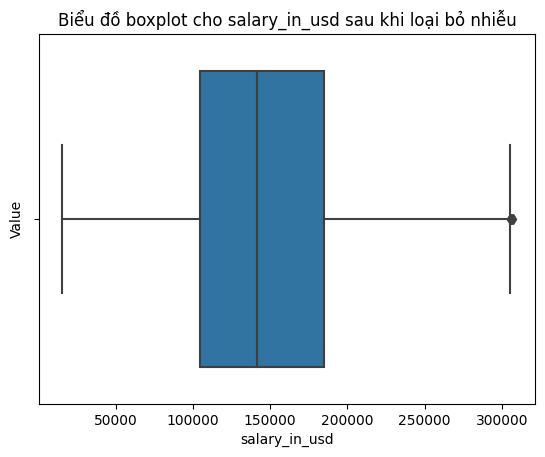

In [ ]:
plt.title('Biểu đồ boxplot cho salary_in_usd sau khi loại bỏ nhiễu')
plt.xlabel('salary_in_usd')
sns.boxplot(x='salary_in_usd', data=df)
plt.ylabel('Value')
plt.show()

## III. Phân tích đa biến

#### Work Year

In [ ]:
# work_year & salary_in_usd - lineplot
# Lineplot thể hiện trung bình lương theo các năm
salary_by_year = df.groupby('work_year')['salary_in_usd'].mean()

fig = px.line(df,
               x=salary_by_year.index.astype('str'),
               y=salary_by_year.values,
               text=np.round(salary_by_year.values,3),
               title='Trung bình lương theo năm')
fig.update_layout(
    xaxis=dict(
        title='Work year',
        titlefont_size=16
    ),
    yaxis=dict(
        title='Trung bình lương (USD)',
        titlefont_size=16
    ),
    yaxis_range=[0, max(salary_by_year.values)]
)
fig.show()


* Xu hướng lương trung bình ngày càng tăng qua các năm, vào năm 2020, mức lương trung bình là khoảng 100 nghìn USD và năm 2023 là khoảng 150 nghìn USD. Tăng 52% trong 3 năm. Chỉ có năm 2021, trung bình lương giảm.

In [ ]:
# work_year & salary_in_usd - boxplot
# Boxplot of salary_in_usd for each of the Work Year
px.box(df,x='work_year',y='salary_in_usd',color='work_year',
       template='seaborn',labels={'work_year':'Work Year',
                                  'salary_in_usd':'salary in usd'},
       title='<b>Data Science Salaries by Work Year',
       width=700, height=900)

* Qua mỗi năm, khoảng biến thiên và khoảng trải giữa của lương cũng có xu hướng ngày càng tăng và mức độ tăng không đồng đều qua các năm.

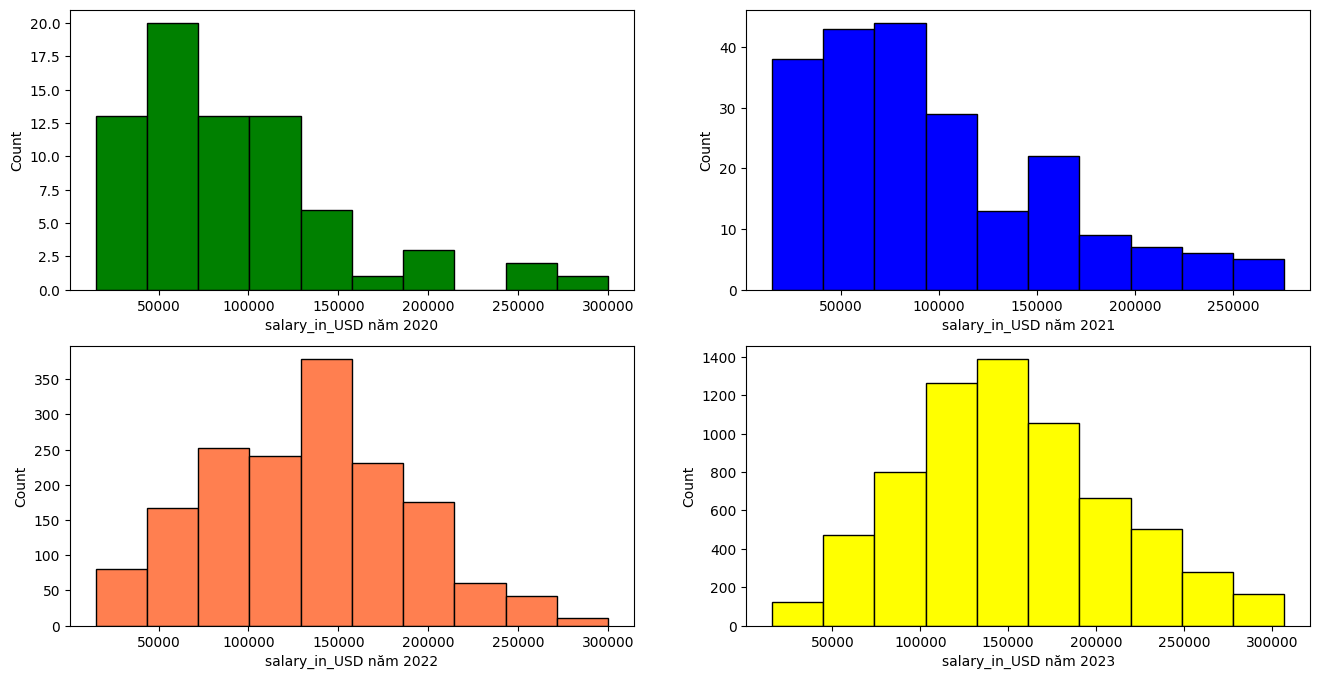

In [ ]:
# work_year & salary_in_usd - subplot, hist
# Biểu đồ tần số lương cho mỗi năm
plt.figure(figsize=(16, 8))

plt.subplot(2, 2, 1)
plt.hist(df[df['work_year']==2020]['salary_in_usd'],  density = False, color = 'green', edgecolor='k')
plt.xlabel('salary_in_USD năm 2020')
plt.ylabel('Count')

plt.subplot(2, 2, 2)
plt.hist(df[df['work_year']==2021]['salary_in_usd'],  density = False, color = 'blue', edgecolor='k')
plt.xlabel('salary_in_USD năm 2021')
plt.ylabel('Count')

plt.subplot(2, 2, 3)
plt.hist(df[df['work_year']==2022]['salary_in_usd'],  density = False, color = 'coral', edgecolor='k')
plt.xlabel('salary_in_USD năm 2022')
plt.ylabel('Count')

plt.subplot(2, 2, 4)
plt.hist(df[df['work_year']==2023]['salary_in_usd'],  density = False, color = 'yellow', edgecolor='k')
plt.xlabel('salary_in_USD năm 2023')
plt.ylabel('Count')

plt.show()

Nhìn 4 biểu đồ, ta thấy biểu đồ đều bị lệch sang trái. Năm 2020 và 2021, độ cao của các thanh hạ dần từ trái sang phải, lương của 2 năm này tập trung nhiều nhất ở khoảng 50 nghìn đến 100 nghìn USD. Nhưng mà đến năm 2022 và 2023, biểu đồ ít lệch sang trái hơn mà đã nhích sang phải, tập trung nhiều ở khoảng 100 nghìn đến 200 nghìn USD.

#### Experience Level

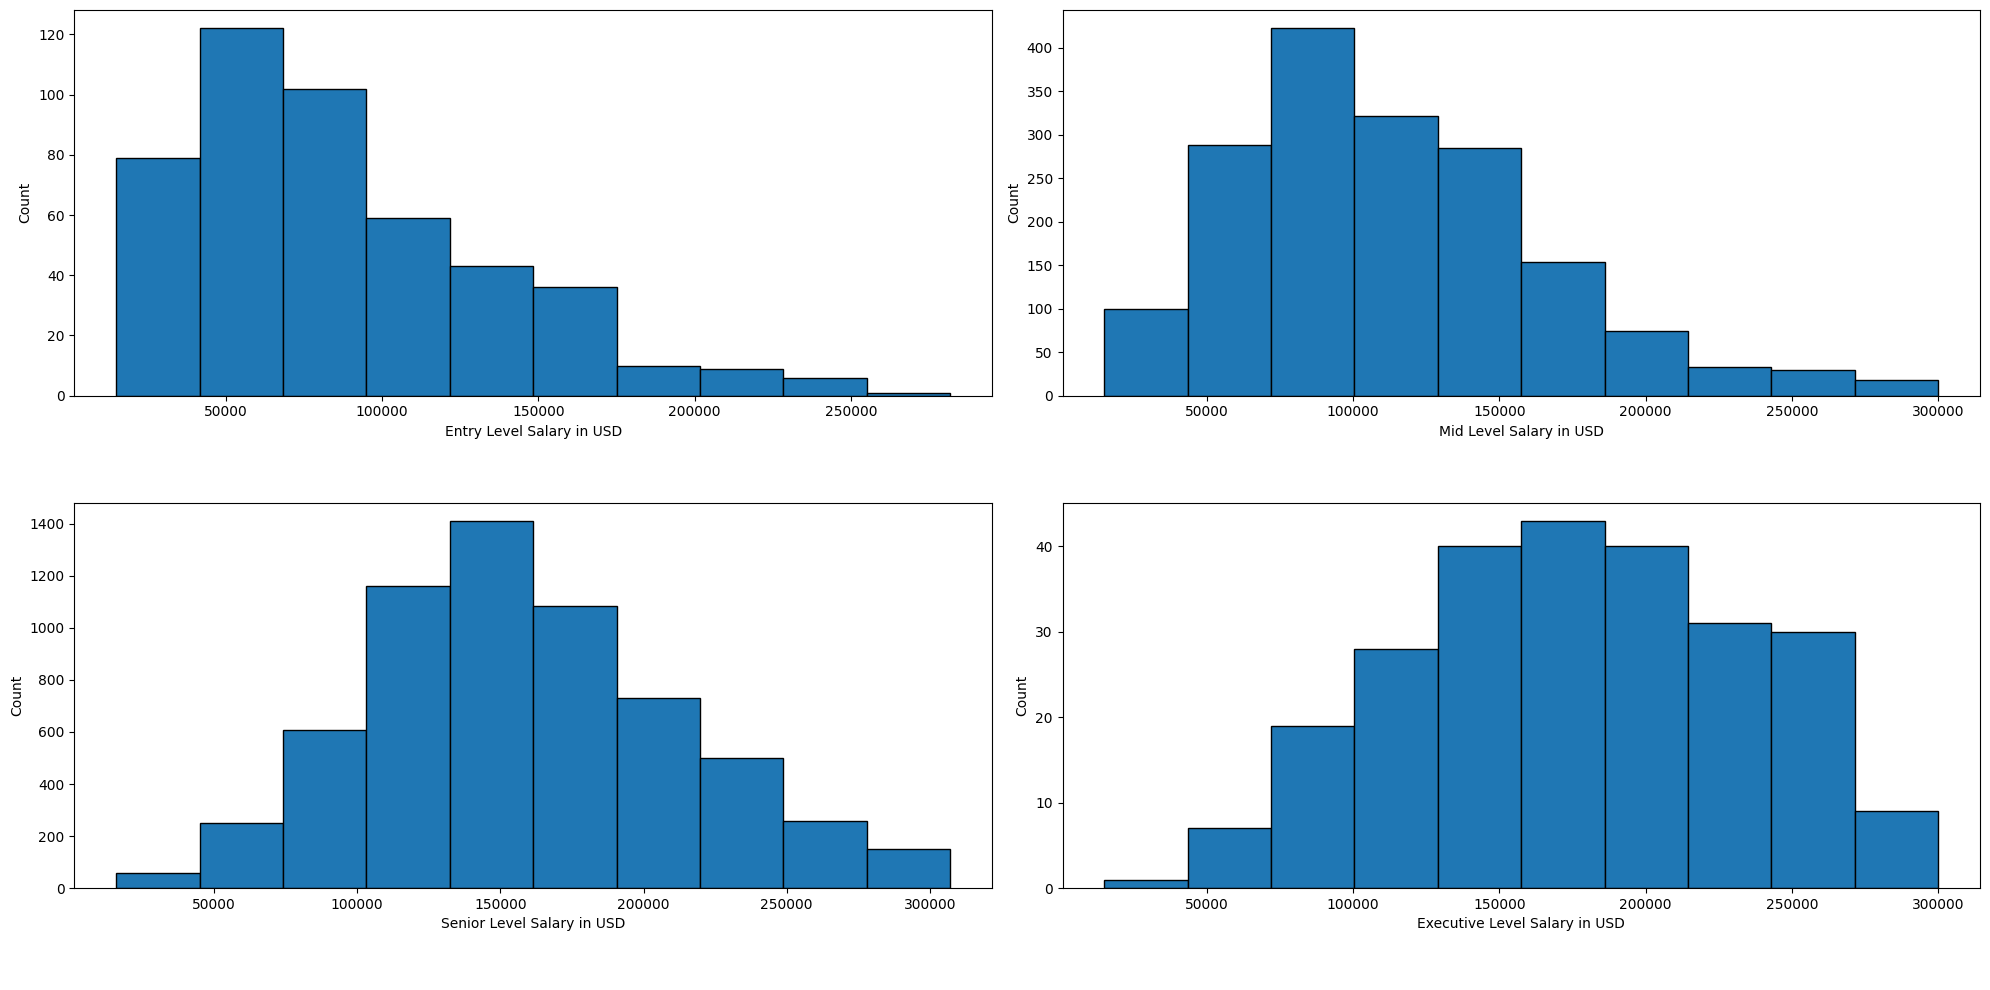

In [ ]:
# experience_level & salary_in_usd - subplot, hist
experience_level_order = ['Entry', 'Mid', 'Senior', 'Executive']

# Biểu diễn số lượng lương theo trình độ kinh nghiệm
plt.figure(figsize=(20, 10))
plt.title('Salary Distribution by Experience Level')
salary_level = df[['experience_level', 'salary_in_usd']]

for i in range(len(experience_level_order)):
  data = salary_level[salary_level['experience_level']==experience_level_order[i]]
  plt.subplot(2, 2, i+1)
  plt.hist(data['salary_in_usd'],  density = False, edgecolor='k')
  plt.xlabel(f'{experience_level_order[i]} Level Salary in USD\n\n\n')
  plt.ylabel('Count')
plt.tight_layout()
plt.show()

Ta thấy 2 biểu đồ đầu tiên bị lệch sang trái nhiều. Đối với trình độ Entry và Mid, độ cao của các thanh hạ dần từ trái sang phải, lương của 2 trình độ này tập trung nhiều nhất ở khoảng 50 nghìn đến 200 nghìn USD, cho thấy tập trung nhiều ở mức lương thấp. Ngược lại, đối với 2 trình độ còn lại, biểu đồ ít lệch sang trái hơn mà đã nhích sang phải, tập trung nhiều ở khoảng 100 nghìn đến 300 nghìn USD,hợp lý với thực tế là trình độ kinh nghiệm càng cao thì mức lương càng cao.

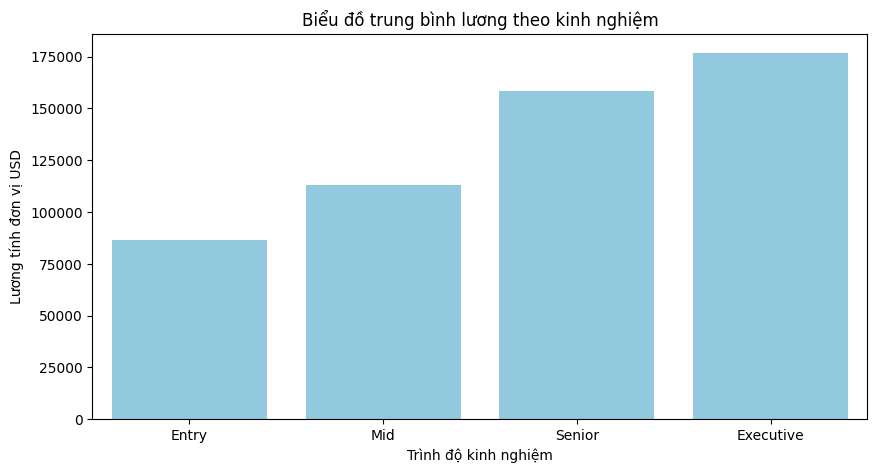

In [ ]:
# experience_level & salary_in_usd
# Biểu đồ trung bình lương theo kinh nghiệm
data = df.groupby('experience_level')['salary_in_usd'].mean()

plt.figure(figsize=(10,5))
ax = sns.barplot(x=data.index, y=data.values, order=experience_level_order, color='skyblue')
ax.set_xlabel('Trình độ kinh nghiệm')
ax.set_ylabel('Lương tính đơn vị USD')
ax.set_title('Biểu đồ trung bình lương theo kinh nghiệm')

plt.show()

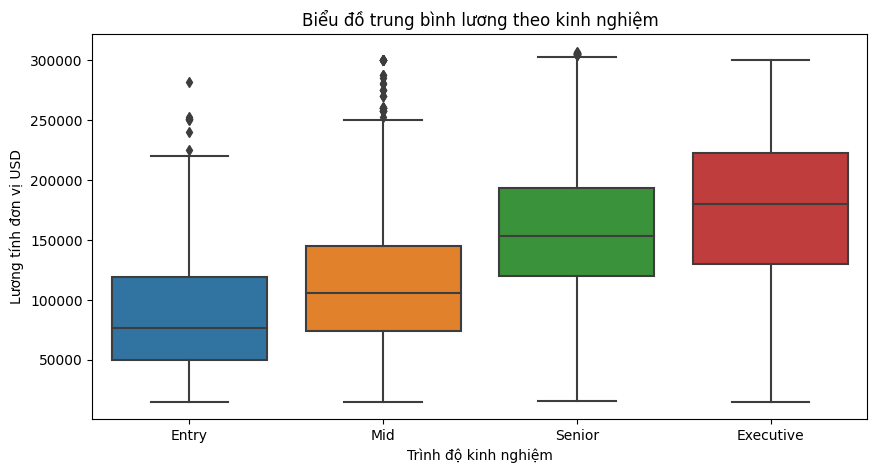

In [ ]:
# experience_level & salary_in_usd
# Mức lương theo kinh nghiệm
plt.figure(figsize=(10,5))
ax = sns.boxplot(data = df, x='experience_level', y='salary_in_usd', order=experience_level_order)
ax.set_xlabel('Trình độ kinh nghiệm')
ax.set_ylabel('Lương tính đơn vị USD')
ax.set_title('Biểu đồ trung bình lương theo kinh nghiệm')

plt.show()

Chúng ta quan sát thấy mối tương quan rõ ràng giữa trình độ và mức lương tính bằng USD, như được mô tả trong biểu đồ. Mức lương tăng đều đặn từ các vị trí cấp thấp, tiến tới các vai trò cấp trung, cấp cao và cuối cùng là điều hành. Xu hướng này phù hợp với những kỳ vọng thực tế, người có nhiều kinh nghiệm và trách nhiệm hơn thường đòi hỏi mức lương cao hơn. Tuy nhiên, cần nghiên cứu sâu hơn về các yếu tố khác, chẳng hạn như ngành, khu vực hoặc quy mô công ty, để hiểu rõ hơn các sắc thái trong dữ liệu và xác thực xu hướng quan sát được trong các bối cảnh khác nhau.

In [ ]:
# experience_level & remote_ratio & salary_in_usd - dotplot
average_salary_experience = df.groupby(['experience_level', 'remote_ratio'])[['salary_in_usd']].mean().reset_index()
average_salary_experience['experience_level'] = pd.Categorical(average_salary_experience['experience_level'], categories=experience_level_order, ordered=True)
average_salary_experience = average_salary_experience.sort_values(by='experience_level')

average_salary_experience['salary_in_usd'] /= 1000

fig = px.scatter(average_salary_experience, x='experience_level', y='salary_in_usd',
                 color='remote_ratio', symbol='remote_ratio',
                 title='Average Salary and Experience by Remote Ratio')
fig.update_traces(marker_size=10)
fig.update_layout(xaxis_title='Experience', yaxis_title='Average Salary (in thousands USD)')

# Set the y-axis range to start from 0 and include even numbers
max_salary = max(average_salary_experience['salary_in_usd'])
yticks = np.arange(0, max_salary + 10, step=20)
fig.update_yaxes(range=[0, max_salary+10], tickvals=yticks)

fig.show()




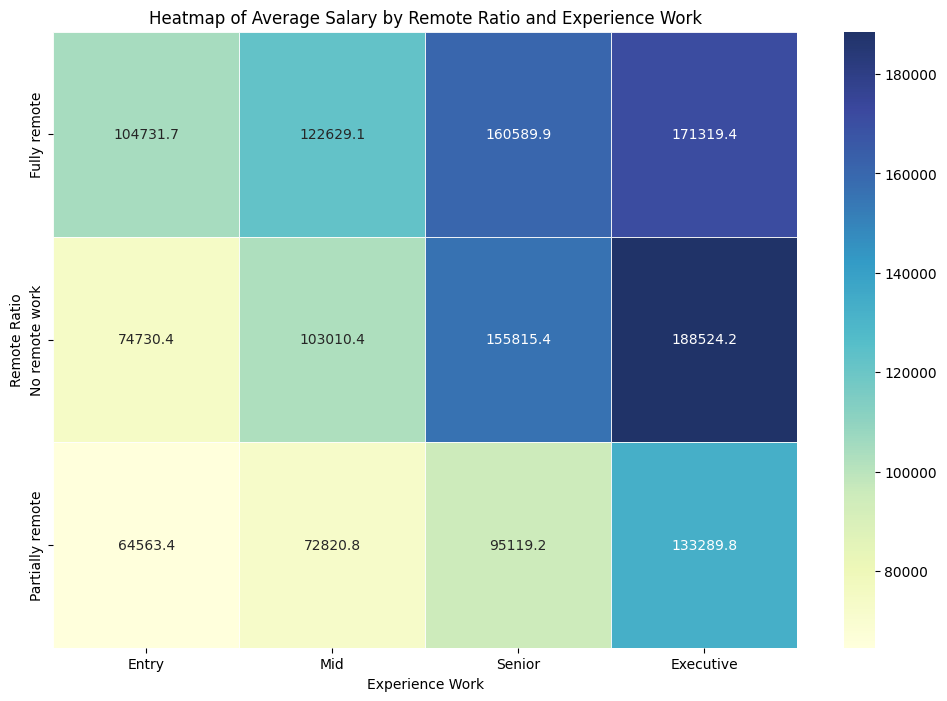

In [ ]:
## Heatmap of Average Salary by Job and Experience Work
average_salary_experience = df.groupby(['experience_level','remote_ratio'])[['salary_in_usd']].mean().reset_index()
average_salary_experience['experience_level'] = pd.Categorical(average_salary_experience['experience_level'], categories=experience_level_order, ordered=True)
average_salary_experience = average_salary_experience.sort_values(by='experience_level')

heatmap_data = average_salary_experience.pivot('remote_ratio', 'experience_level', 'salary_in_usd')

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", fmt=".1f",
            linewidths=0.5, alpha = 0.9)

plt.title('Heatmap of Average Salary by Remote Ratio and Experience Work')
plt.xlabel('Experience Work')
plt.ylabel('Remote Ratio')
plt.show()

* Mức lương tăng theo cả 2 chiều trình độ kinh nghiệm và hình phức làm việc (tăng từ làm việc từ xa một phần, không làm việc từ xa đến làm việc từ xa hoàn toàn). Nhìn vào heatmap, ta có thể thấy những ô trên cùng đường chéo có màu gần giống nhau, cho thấy lương trung bình của những ô này giống nhau. Vậy thì nếu trình độ kinh nghiệm cao hơn nhưng hình thức làm việc thấp hơn thì mức lương dự đoán sẽ gần bằng nhau. Có một trường hợp đặc biệt là lương của trình độ Executive của hình thức không làm việc từ xa cao hơn cả hình thức làm việc từ xa hoàn toàn, có thể là do các vị trí Executive thường đòi hỏi mức độ trách nhiệm và cam kết cao. Một số công việc yêu cầu sự hiện diện và tương tác trực tiếp nhiều hơn, điều này có thể làm tăng khả năng những người làm việc từ xa một phần có mức lương cao hơn.


#### Job Title

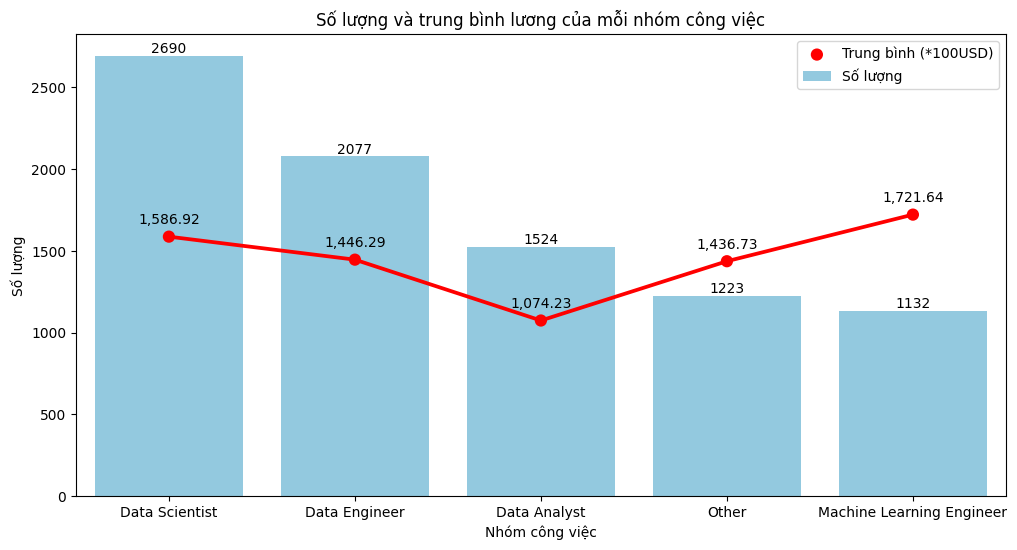

In [ ]:
# job_title & salary_in_usd - bar, dot
# Tính toán dữ liệu và vẽ biểu đồ
count_values = df['job_title_clean'].value_counts().reset_index()
mean_values = df.groupby('job_title_clean')['salary_in_usd'].mean().reset_index()
mean_values['salary_in_usd'] = mean_values['salary_in_usd']/100
mean_values['job_title_clean'] = pd.Categorical(mean_values['job_title_clean'], categories=count_values['index'], ordered=True)
mean_values = mean_values.sort_values(by='job_title_clean')

# Tùy chỉnh biểu đồ
plt.figure(figsize=(12, 6))

# Bar chart cho số lượng
ax = sns.barplot(x=count_values['index'], y=count_values['job_title_clean'], color='skyblue', label='Số lượng')

# Dot plot cho trung bình
ax = sns.pointplot(x=mean_values['job_title_clean'], y=mean_values['salary_in_usd'], color='red', markers='o', scale=1, label='Trung bình (*100USD)')

for i, v in enumerate(count_values['job_title_clean']):
    ax.annotate(str(v), xy=(i, v), ha='center', va='bottom')

# Thêm thông tin số liệu trung bình trên biểu đồ
for i, v in enumerate(mean_values['salary_in_usd']):
    ax.annotate('{:,.2f}'.format(v), xy=(i, v + 100), ha='center', va='center')

plt.title('Số lượng và trung bình lương của mỗi nhóm công việc')
plt.xlabel('Nhóm công việc')
plt.ylabel('Số lượng')

plt.legend()
plt.show()

Biểu đồ được sắp xếp dựa trên mức độ phổ biến của từng nhóm công việc theo thứ tự giảm dần, mỗi thanh biểu thị số lượng công việc cho từng vai trò và mỗi chấm đỏ biểu thị mức lương trung bình cho mỗi nhóm công việc. Chúng ta có thể thấy rằng "Data Scientist" là công việc phổ biến nhất với 2752 công việc trong tập dữ liệu này, tiếp theo là "Data Engineer" và "Data Analyst". 3 công việc này không có mức lương cao nhất, thậm chí vai trò "Data Analyst" còn có mức lương thấp nhất (108K USD). Mức lương được trả cao nhất là trong các nhóm công việc "Machine Learning Engineer".

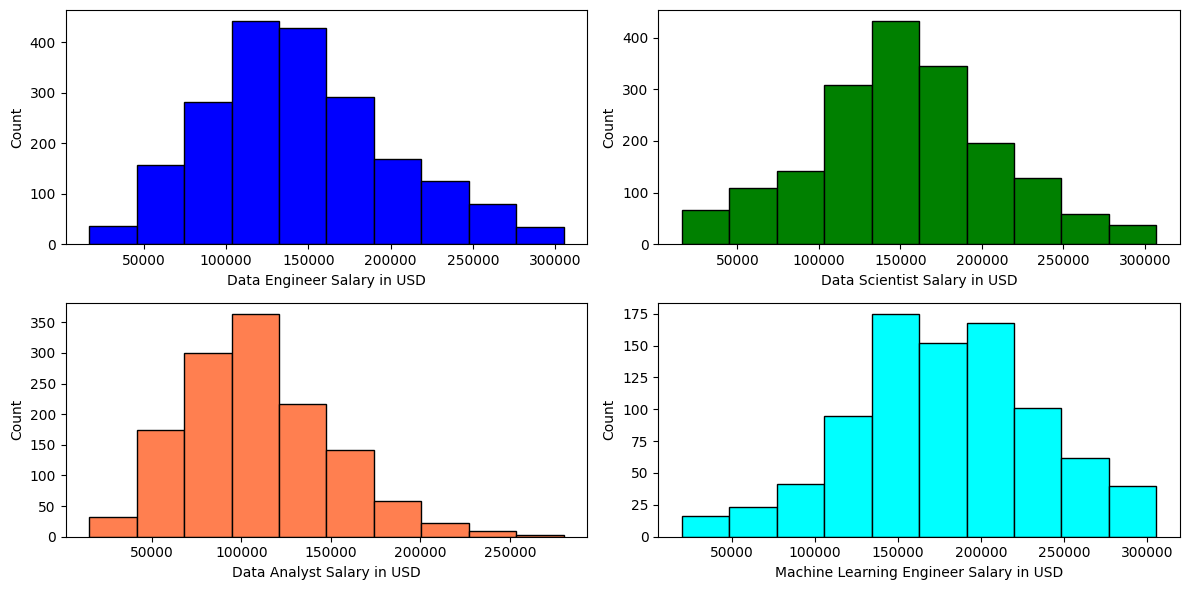

In [ ]:
## Tần số lương cho từng nhóm công việc

plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.hist(df[df['job_title']=='Data Engineer']['salary_in_usd'],  density = False, color = 'blue', edgecolor='k')
plt.xlabel('Data Engineer Salary in USD')
plt.ylabel('Count')

plt.subplot(2, 2, 2)
plt.hist(df[df['job_title']=='Data Scientist']['salary_in_usd'],  density = False, color = 'green', edgecolor='k')
plt.xlabel('Data Scientist Salary in USD')
plt.ylabel('Count')

plt.subplot(2, 2, 3)
plt.hist(df[df['job_title']=='Data Analyst']['salary_in_usd'],  density = False, color = 'coral', edgecolor='k')
plt.xlabel('Data Analyst Salary in USD')
plt.ylabel('Count')

plt.subplot(2, 2, 4)
plt.hist(df[df['job_title']=='Machine Learning Engineer']['salary_in_usd'],  density = False, color = 'cyan', edgecolor='k')
plt.xlabel('Machine Learning Engineer Salary in USD')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [ ]:
## Biểu đồ boxplot lương của 4 nhóm công việc nhiều nhất.
px.box(df[df['job_title_clean'].isin(df['job_title_clean'].unique())],x='job_title_clean',y='salary_in_usd',color='job_title_clean',
       template='seaborn',labels={'job_title_clean':'Job Title',
                                  'salary_in_usd':'salary in usd'},
       title='<b>Data Science Salaries for each of the Job Title',
       width=1300, height=600)

* •	Biểu đồ này cho thấy mỗi nhóm công việc đều xuất hiện outliers và khoảng biến thiên của dữ liệu của mỗi nhóm cũng khá lớn, ví dụ như nhóm ‘Data Science’ biến thiên từ 50k đến 300k. Điều này cho thấy mặc dù cùng nhóm công việc nhưng có thể có nhiều mức lương khác nhau do nhiều nguyên nhân như kỹ năng, kinh nghiệm, hiệu suất công việc, …

In [ ]:
average_salary_experience = df.groupby(['experience_level', 'job_title_clean'])[['salary_in_usd']].mean().reset_index()

fig = px.scatter(average_salary_experience, x='job_title_clean', y='salary_in_usd',
                 color='experience_level', symbol='experience_level',
                 title='Average Salary and job by company')
fig.update_traces(marker_size=12)

max_salary = max(average_salary_experience['salary_in_usd'])
yticks = np.arange(0, max_salary + 1, step=2)
fig.update_yaxes(range=[0, max_salary], tickvals=yticks)

fig.update_layout(xaxis_title='Job', yaxis_title='Average Salary (in thousands USD)')
fig.show()


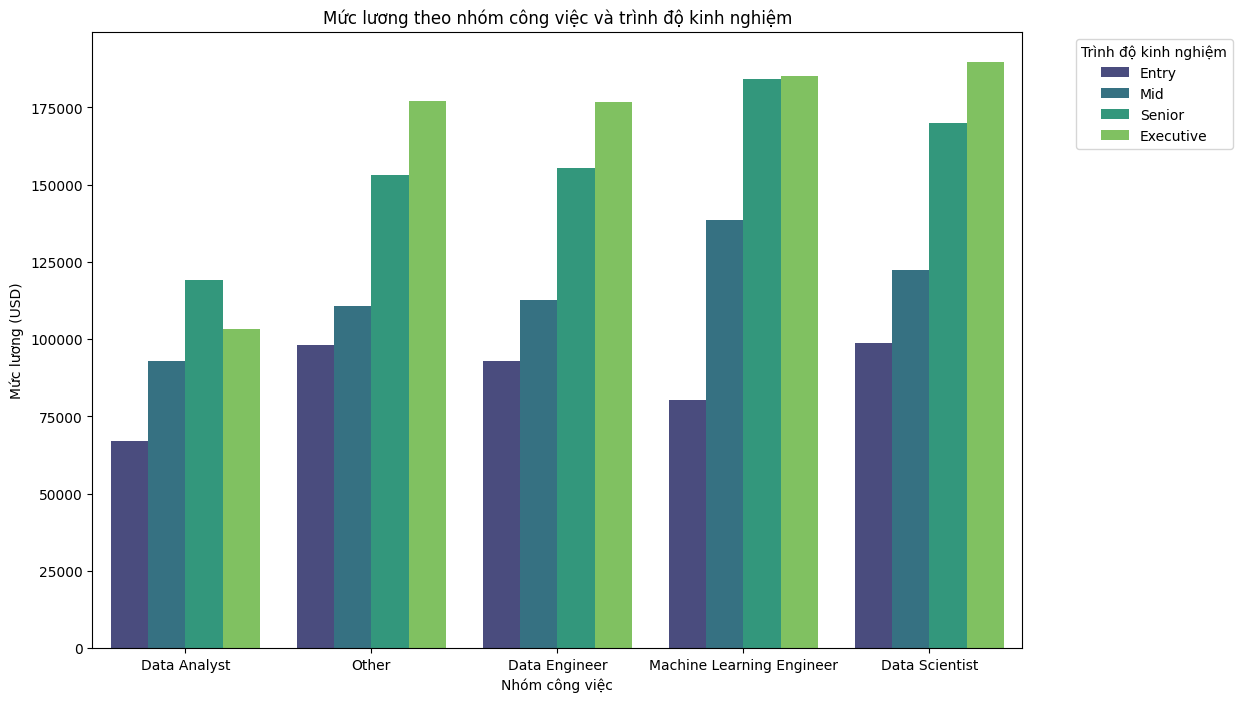

In [ ]:
# Tính mức lương trung bình cho mỗi nhóm công việc và trình độ kinh nghiệm
salary_by_experience = df.groupby(['job_title_clean', 'experience_level'])['salary_in_usd'].mean().reset_index()
salary_by_experience['experience_level'] = pd.Categorical(salary_by_experience['experience_level'], categories=experience_level_order, ordered=True)
salary_by_experience = salary_by_experience.sort_values(by='experience_level')


# Vẽ biểu đồ
plt.figure(figsize=(12, 8))
sns.barplot(x='job_title_clean', y='salary_in_usd', hue='experience_level', data=salary_by_experience, palette='viridis')
plt.title('Mức lương theo nhóm công việc và trình độ kinh nghiệm')
plt.xlabel('Nhóm công việc')
plt.ylabel('Mức lương (USD)')
plt.legend(title='Trình độ kinh nghiệm', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

* Hầu hết các nhóm công việc đều có mức lương tăng theo trình độ kinh nghiệm. Khi kinh nghiệm càng cao thì lương tăng cao một cách rõ rệt, biến động nhiều. Riêng chỉ có nhóm 'Data Analyst' lại khác biệt một chút khi trung bình lương của trình độ Senior lại cao nhất, và lương của trình độ kinh nghiệm khác nhau không có biến động nhiều như các nhóm công việc khác, có thể là do nhu cầu thị trường thay đổi, nhưng điều này cũng phụ thuộc vào rất nhiều yếu tố khác.



In [ ]:
# job_title & company_size & salary_in_usd - dotplot
average_salary_experience = df.groupby(['company_size', 'job_title_clean'])[['salary_in_usd']].mean().reset_index()
average_salary_experience['salary_in_usd'] /= 1000

fig = px.scatter(average_salary_experience, x='job_title_clean', y='salary_in_usd',
                 color='company_size', symbol='company_size',
                 title='Average Salary and job by company')
fig.update_traces(marker_size=12)

min_salary = min(average_salary_experience['salary_in_usd'])
fig.update_yaxes(range=[min_salary, max(average_salary_experience['salary_in_usd'])])

fig.update_layout(xaxis_title='Job', yaxis_title='Average Salary (in thousands USD)')
fig.show()


* Trong các nhóm công việc, lương tăng từ vị trí công ty từ nhỏ đến lớn rồi đến vừa. Ở nhóm các công việc Data Analyst, thì lương của công ty nhỏ và lớn gần bằng nhau.

#### Company Size

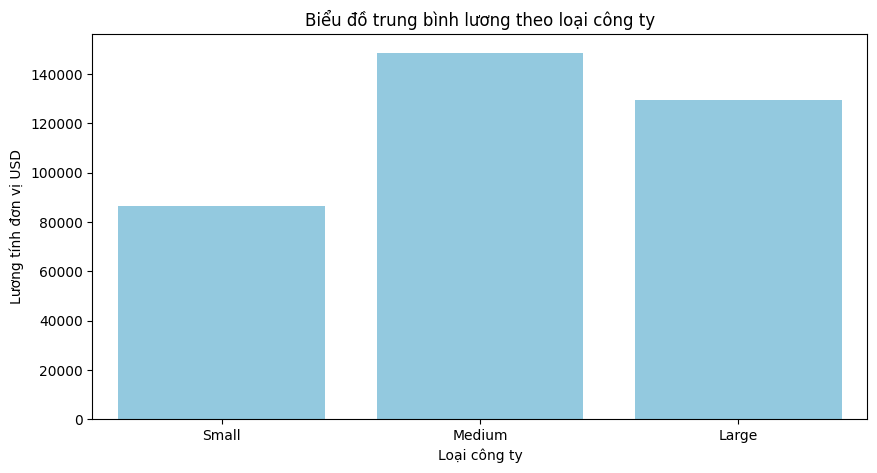

In [ ]:
company_size_order = ['Small', 'Medium', 'Large']

# Biểu đồ trung bình lương theo loại công ty
data = df.groupby('company_size')['salary_in_usd'].mean()

plt.figure(figsize=(10,5))
ax = sns.barplot(x=data.index, y=data.values, order=company_size_order, color='skyblue')
ax.set_xlabel('Loại công ty')
ax.set_ylabel('Lương tính đơn vị USD')
ax.set_title('Biểu đồ trung bình lương theo loại công ty')

plt.show()

In [ ]:
## Company Size & Salary - boxplot
px.box(df,x='company_size',y='salary_in_usd',color='company_size',
       template='ggplot2',labels={'company_size':'company size',
                                  'salary_in_usd':'salary in usd'},
       title='<b>Data Science Salaries by Company Size',
       width=1000, height=600)

Mức lương trung bình cao nhất được quan sát thấy ở các doanh nghiệp quy mô vừa, trong khi mức lương thấp nhất được thấy ở các doanh nghiệp quy mô nhỏ. Điều này có thể gợi ý rằng các doanh nghiệp cỡ trung bình, thường đang trong giai đoạn tăng trưởng và mở rộng, sẵn sàng đầu tư nhiều hơn vào nhân tài. Mặt khác, các doanh nghiệp nhỏ, có thể có ngân sách hạn chế, có xu hướng đưa ra mức lương trung bình thấp hơn. Ngược lại, các doanh nghiệp quy mô lớn có thể có cơ cấu trả lương ổn định và phân bổ ngân sách chặt chẽ, có khả năng dẫn đến mức lương trung bình tương đối thấp hơn so với các doanh nghiệp quy mô vừa.

Tuy nhiên, những phát hiện này cần xem xét lại một cách thận trọng, vì các doanh nghiệp quy mô lớn và doanh nghiệp quy mô nhỏ không được thể hiện đầy đủ trong tập dữ liệu, chỉ chiếm lần lượt 8,7% và 2,1%. Do đó, dữ liệu có thể không phản ánh đầy đủ sự phân bổ tiền lương giữa các quy mô công ty khác nhau.

#### Remote Ratio

In [ ]:
## Boxplot of salary_in_usd by Remote ratio
px.box(df,x='remote_ratio',y='salary_in_usd',color='remote_ratio',
       template='seaborn',labels={'remote_ratio':'Remove Ratio',
                                  'salary_in_usd':'salary in usd'},
       title='<b>Data Science Salaries by Remove Ratio',
       width=1000, height=600)

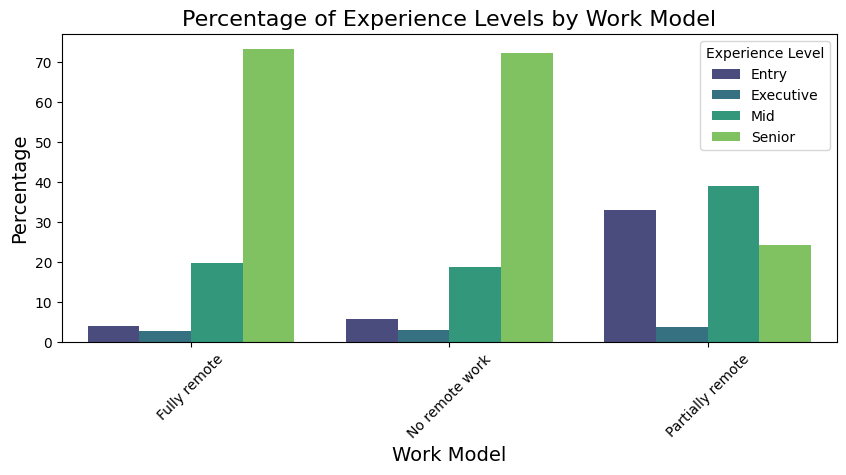

In [ ]:
# Nhóm dữ liệu theo mô hình công việc và mức độ kinh nghiệm, tính toán số lượng cho mỗi kết hợp
grouped_data = df.groupby(['remote_ratio', 'experience_level']).size().reset_index(name='count')

# Tính tổng số cho từng mô hình công việc để tìm tỷ lệ phần trăm sau này
total_counts = grouped_data.groupby('remote_ratio')['count'].sum().reset_index(name='total_count')

# Merging the total counts back into the grouped data
merged_data = pd.merge(grouped_data, total_counts, on='remote_ratio')

# Calculating the percentage of each experience level for each work model
merged_data['percentage'] = (merged_data['count'] / merged_data['total_count']) * 100


# Plotting the percentage of experience levels for each work model
plt.figure(figsize=(10,4))

sns.barplot(data=merged_data, x='remote_ratio', y='percentage', hue='experience_level', palette='viridis')

plt.title('Percentage of Experience Levels by Work Model', fontsize=16)
plt.ylabel('Percentage', fontsize=14)
plt.xlabel('Work Model', fontsize=14)
plt.tick_params(axis='x', rotation=45)
plt.legend(title='Experience Level')
plt.show()

* Biểu đồ cho thấy những vị trí làm việc từ xa có xu hướng đưa ra mức lương trung bình cao hơn một chút so với những vị trí yêu cầu có mặt tại chỗ. Điều này có thể là do các công ty chủ yếu hoạt động từ xa có chi phí thấp hơn, vì họ có thể không cần đầu tư nhiều vào cơ sở vật chất và nguồn lực tại chỗ. Các công ty này có thể có xu hướng phân bổ một phần tiền để chi trả lương cho nhân viên.
* Ngược lại, các vị trí áp dụng mô hình làm việc kết hợp có mức lương trung bình thấp nhất trong ba loại. Ta thấy rằng tỷ lệ phần trăm vị trí ở trình độ Entry và Mid là cao nhất đối với công việc làm việc từ xa một phần, điều này khá hợp lý. Tuy nhiên, điều quan trọng là phải xem xét điều này một cách thận trọng vì các vị trí làm việc từ xa một phần chỉ chiếm 2,7% dữ liệu. Việc thiếu dữ liệu như vậy có thể làm sai lệch con số lương trung bình.

#### Company Location

In [ ]:
average_salary_by_company = df.groupby('company_location')['salary_in_usd'].mean().reset_index()
fig = px.choropleth(locations=average_salary_by_company['company_location'],
                    color=average_salary_by_company['salary_in_usd'],
                    color_continuous_scale=px.colors.sequential.YlGn,
                    # template='plotly_dark',
                    title = 'Biểu đồ địa lý mức lương theo company_location')

fig.update_layout(font = dict(size= 17, family="Segoe UI"))
fig.show()

Trong đồ thị này, mức lương trung bình theo quốc gia được vẽ trên bản đồ. Các quốc gia màu xanh trời nhạt là những quốc gia không có thông tin về công việc dữ liệu ở đó. Chúng ta có thể thấy rằng mức lương cao nhất trên toàn thế giới là ở Bắc Mỹ (Mỹ, Canada và Mexico), ở Trung Đông (cụ thể là Qatar, Israel và Ả Rập Saudi) và ở Châu Đại Dương (Úc và New Zealand). Cần nhiều dữ liệu hơn để phân tích tốt hơn về khía cạnh này vì có nhiều quốc gia không có thông tin và nhiều quốc gia chỉ có 1 hoặc 2 việc làm (vì vậy mức lương không đại diện cho những gì đang xảy ra ở quốc gia đó).

#### Kiểm định tương quan

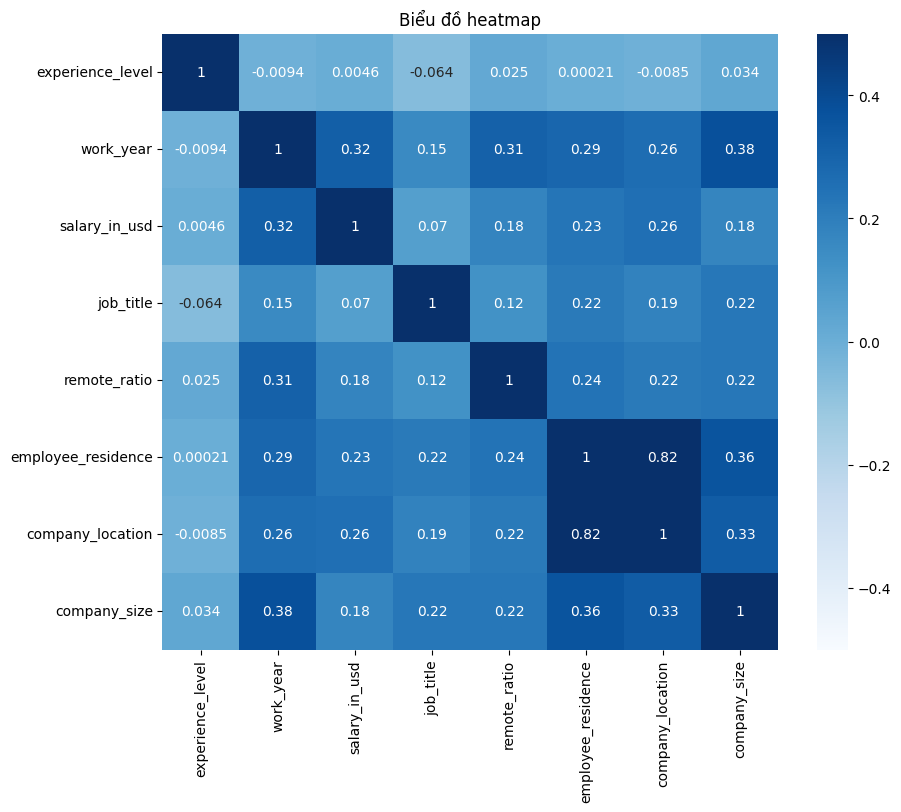

In [ ]:
vars = ['experience_level', 'work_year', 'salary_in_usd', 'job_title', 'remote_ratio', 'employee_residence', 'company_location', 'company_size']

# Tạo ma trận tương quan giữa các biến
corr_matrix = df[vars].apply(lambda x: pd.factorize(x)[0]).corr()

# Tạo heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', square=True, vmin=-0.5, vmax=0.5)

# Hiển thị biểu đồ
plt.title('Biểu đồ heatmap')
plt.show()

* Trong biểu đồ, có xuất hiện 2 thuộc tính có tương quan cao là employee_residence và company_location. Thực hiện kiểm định Chi bình phương để kiểm định lại

##### Kiểm định Chi - bình phương

In [ ]:
# Bước 1: Tạo bảng chéo crosstab giữa biến employee_residence và company_location
crosstab_table = pd.crosstab(df['employee_residence'], df['company_location'])

# Bước 2: Chuyển đổi bảng crosstab thành array
observed_array = crosstab_table.values

# Bước 3: Kiểm định Chi-square và kết luận theo phương pháp p-value
chi2, p, _, _ = chi2_contingency(observed_array)

alpha = 0.05
confidence_level = 1 - alpha

if p < alpha:
    conclusion = "Bác bỏ giả thuyết Ho: employee_residence và company_location là PHỤ THUỘC lẫn nhau."
else:
    conclusion = "Không thể bác bỏ giả thuyết Ho: employee_residence và company_location là ĐỘC LẬP."

# In kết quả
print("Kết quả kiểm định Chi-square:")
print("p-value: {:.10f}".format(p))
print("Kết luận:", conclusion)

Kết quả kiểm định Chi-square:
p-value: 0.0000000000
Kết luận: Bác bỏ giả thuyết Ho: employee_residence và company_location là PHỤ THUỘC lẫn nhau.


* Vì 2 thuộc tính employee_residence và company_location tương quan với nhau nên bỏ một thuộc tính, thuộc tính bị bỏ đi là employee_residence. Nguyên nhân có thể là do thường nhân viên ở nước nào thì họ làm việc tại quốc gia của mình.


##### Kiểm định ANOVA

In [ ]:
# 1. Tạo dataframe chứa các mẫu dữ liệu
_2020=df[df['work_year']==2020]['salary_in_usd'].reset_index(drop=True)
_2021=df[df['work_year']==2021]['salary_in_usd'].reset_index(drop=True)
_2022=df[df['work_year']==2022]['salary_in_usd'].reset_index(drop=True)
_2023=df[df['work_year']==2023]['salary_in_usd'].reset_index(drop=True)
data=pd.DataFrame({'_2020':_2020,'_2021':_2021,'_2022':_2022,'_2023':_2023})
data.head()

,_2020,_2021,_2022,_2023
0,100000.0,185000.0,36940.0,212000
1,44753.0,56000.0,80000.0,190000
2,164000.0,60000.0,97712.0,43064
3,47899.0,150000.0,16455.0,43064
4,300000.0,30000.0,15000.0,245700


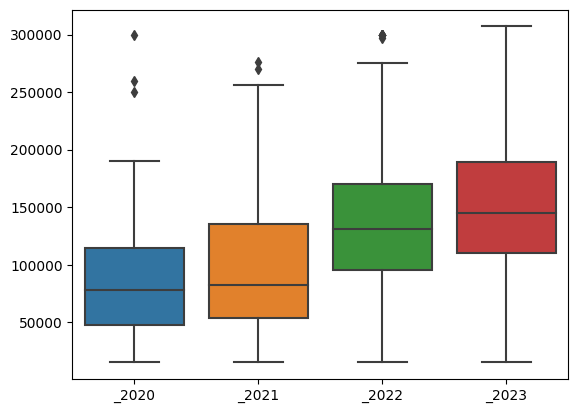

In [ ]:
# 2. Biểu diễn trực quan bằng Boxplot --> quan sát sự khác biệt giữa các nhóm
sns.boxplot(data = data)
plt.show()

In [ ]:
##------------------------------------------------------------------------------
## 3. Phân tích ANOVA với alpha = 5%.
##------------------------------------------------------------------------------
alpha = .05
## 3a) Kiểm định điều kiện _2020, _2021, _2022 có cùng phương sai (Levene)
##-------------------------------------------------
print('''Các giả thuyết kiểm định LEVENE:
    H0: VAR(_2020) = VAR(_2021) = VAR(_2022) = VAR(_2023)
    Ha: Các phương sai KHÔNG BẰNG NHAU''')
##-------------------------------------------------
levene, p = sp.stats.levene(_2020,_2021,_2022,_2023)
print(f'\nTrị thống kê Levene = {levene:4f}; p = {p:4f}')
if  p>alpha:
  print(f'p > alpha cho nên KHÔNG bác bỏ H0: VAR(_2020) = VAR(_2021) = VAR(_2022) = VAR(_2023)')
else:
  print(f'p < alpha cho nên bác bỏ H0 -> Các phương sai không bằng nhau.')

Các giả thuyết kiểm định LEVENE:
    H0: VAR(_2020) = VAR(_2021) = VAR(_2022) = VAR(_2023)
    Ha: Các phương sai KHÔNG BẰNG NHAU

Trị thống kê Levene = 2.803982; p = 0.038285
p < alpha cho nên bác bỏ H0 -> Các phương sai không bằng nhau.


In [ ]:
## 3b) Áp dụng One-way ANOVA
##     Hàm f_oneway() chỉ trả về F-statistic và p-value, KHÔNG tạo ANOVA table
f, p = sp.stats.f_oneway(_2020, _2021, _2022, _2023)
print('H0: KHÔNG có sự khác biệt giữa lương qua các năm.')
print('Ha: Có sự khác biệt giữa lương qua các năm.\n')
if (p < alpha):
    print(f'* Trị số p = {p} < {alpha} cho nên bác bỏ H0 ==> có sự khác biệt giữa lương qua các năm')
else:
    print(f'* Trị số p = {p} >= {alpha} cho nên KHÔNG bác bỏ H0 ==> KHÔNG có sự khác biệt giữa lương qua các năm')
## p-value có ý nghĩa về mặt thống kê (p < 0.05)

H0: KHÔNG có sự khác biệt giữa lương qua các năm.
Ha: Có sự khác biệt giữa lương qua các năm.

* Trị số p = 8.193496357672687e-77 < 0.05 cho nên bác bỏ H0 ==> có sự khác biệt giữa lương qua các năm


In [ ]:
## 3c) Hậu kiểm Tukey HSD
df_melt = pd.melt(data.reset_index(),
                  id_vars = ['index'],
                  value_vars = ['_2020', '_2021', '_2022','_2023'])
df_melt=df_melt.dropna()
df_melt.columns = ['index', 'work_year', 'value']  # tên các cột
model           = ols('value ~ C(work_year)', data = df_melt).fit()

m_comp = pairwise_tukeyhsd(endog  = df_melt['value'],
                           groups = df_melt['work_year'],
                           alpha  = 0.05)
print(m_comp)

KeyError: ignored

* Ngoại trừ cặp (_2020, _2021) có reject = False, tất cả so sánh những cặp khác đều bác bỏ H0 (reject = True), nghĩa là có sự khác biệt đáng kể về mặt thống kê.

### Tổng kết
1. Tập dữ liệu chủ yếu đại diện cho năm 2023 (76,1%) và các doanh nghiệp vừa (89,2%). Các vị trí từ xa và cấp cao đặc biệt phổ biến, chiếm lần lượt 58,8% và 72,2% dữ liệu.
2. Thông tin chi tiết về phân phối tiền lương: Dữ liệu tiền lương hơi lệch trái với mức lương trung bình khoảng 150 nghìn USD và độ lệch chuẩn là khoảng 64 nghìn USD. Sự phân bổ không đồng đều trong một số số liệu nhất định cho thấy các khu vực cần khám phá chi tiết.
3. Các công việc liên quan đến dữ liệu không ngừng tăng lên trong những năm qua, số lượng việc làm tăng theo cấp số nhân và mức lương thực sự tốt và cũng tăng theo thời gian.
4. Những công việc phổ biến nhất không phải là những công việc được trả nhiều tiền nhất mà trung bình tất cả các vị trí đều được trả hơn 100 nghìn USD mỗi năm. "Data Scientist", "Data Engineer" và "Data Analyst" là 3 công việc phổ biến hơn và chúng không ngừng gia tăng.
5. Nếu ai đó muốn có công việc với mức lương cao hơn có thể, anh ấy/cô ấy phải tìm kiếm một vị trí hoàn toàn từ xa hoặc hoàn toàn chuyên nghiệp, trong một công ty quy mô vừa hoặc lớn, với vị trí toàn thời gian hoặc làm việc theo hợp đồng, bán thời gian. công việc hoặc một công việc tự do nó không mang lại lợi nhuận. Và lý tưởng nhất là công việc phải ở Bắc Mỹ, Trung Đông hoặc Châu Đại Dương.
6. Mối tương quan giữa trình độ kinh nghiệm và tiền lương: Có một mối liên hệ vừa phải giữa kinh nghiệm của một cá nhân và mức lương của họ, cho thấy rằng nhiều kinh nghiệm hơn thường dẫn đến mức lương cao hơn. Tuy nhiên, có những điểm mâu thuẫn được lưu ý, chẳng hạn như vai trò 'Data Analyst' không nhất thiết phải có thâm niên cao hơn nhưng vẫn được trả lương cao, cho thấy giá trị của các kỹ năng chuyên môn.
7. Ảnh hưởng của mô hình làm việc đến lương: Các vị trí từ xa dẫn đầu về mức lương trung bình đưa ra một chút, có thể phản ánh khả năng tiết kiệm chi phí của công ty. Ngược lại, mô hình làm việc từ xa một phần, chiếm 2,7% tập dữ liệu, có mức lương trung bình thấp nhất, kết quả có thể bị ảnh hưởng bởi sự chiếm ưu thế của các vị trí cấp đầu vào trong danh mục này.
8. Tác động của quy mô công ty đến tiền lương: Các doanh nghiệp quy mô vừa nổi lên như những công ty trả lương cao nhất, theo sau là các doanh nghiệp quy mô nhỏ. Các doanh nghiệp lớn có mức lương trung bình thấp hơn so với các doanh nghiệp vừa. Tuy nhiên, sự thiếu đại diện của các công ty lớn (8,7%) và quy mô nhỏ (2,1%) trong dữ liệu cảnh báo việc đưa ra các kết luận sâu rộng.
9. Chức danh công việc và Mức lương thay đổi: Sự chênh lệch về lương rõ rệt được ghi nhận giữa các chức danh công việc, với các vai trò như "Nhà khoa học nghiên cứu" và "Kỹ sư ML" vượt xa đáng kể về mức lương "Người quản lý dữ liệu" và "Nhà phân tích dữ liệu". Điều này chỉ ra rằng các kỹ năng và trách nhiệm chuyên môn có thể đòi hỏi phí bảo hiểm thị trường cao hơn.
10. Sự thay đổi mức lương dựa trên vị trí: Hoa Kỳ, Canada và Vương quốc Anh là những khu vực hàng đầu về mức lương trung bình.
11. Mặc dù các xu hướng và mối tương quan nhất định xuất hiện, chẳng hạn như kinh nghiệm ảnh hưởng đến mức lương và các vị trí từ xa được trả lương cao hơn một chút, nhưng những hạn chế của tập dữ liệu đòi hỏi phải diễn giải thận trọng. Các nghiên cứu bổ sung bao gồm một tập hợp rộng hơn các yếu tố như ngành, vị trí địa lý và quy mô công ty có thể cung cấp sự hiểu biết toàn diện hơn về động thái tiền lương được quan sát.

## IV. Thu gọn dữ liệu

In [ ]:
# Bỏ cột employment_type vì cột này biến thiên quá ít
df.drop(df[['employment_type']],axis=1, inplace=True)
# Bỏ cột employee_residence vì cột này tương quan với cột company_location
df.drop(df[['employee_residence']],axis=1, inplace=True)

## V. Chuyển dạng dữ liệu

In [ ]:
df.reset_index(inplace = True)
df

,index,work_year,experience_level,job_title,salary_in_usd,remote_ratio,company_location,company_size,remote_ratio_clean,job_title_clean
0,0,2023,Executive,Data Science Director,212000,Fully remote,USA,Medium,0,Data Scientist
1,1,2023,Executive,Data Science Director,190000,Fully remote,USA,Medium,0,Data Scientist
2,2,2023,Mid,Business Intelligence Engineer,43064,Fully remote,GBR,Medium,0,Other
3,3,2023,Mid,Business Intelligence Engineer,43064,Fully remote,GBR,Medium,0,Other
4,4,2023,Senior,Machine Learning Engineer,245700,Fully remote,USA,Medium,0,Machine Learning Engineer
...,...,...,...,...,...,...,...,...,...,...
8641,8799,2021,Senior,Data Specialist,165000,No remote work,USA,Large,100,Other
8642,8801,2021,Mid,Principal Data Scientist,151000,No remote work,USA,Large,100,Data Scientist
8643,8802,2020,Entry,Data Scientist,105000,No remote work,USA,Small,100,Data Scientist
8644,8803,2020,Entry,Business Data Analyst,100000,No remote work,USA,Large,100,Data Analyst


In [ ]:
# company_location
def location(title):
    if any(keyword in title.lower() for keyword in ['usa']):
      return 1
    else:
        return 0
df['company_location_clean'] = df['company_location'].apply(location)

In [ ]:
# Company size
mapping_dict = {'Small': 1, 'Medium': 2, 'Large': 3}
df['company_size_clean'] = df['company_size'].map(mapping_dict)

In [ ]:
# experience_level
mapping_dict = {'Entry': 1, 'Mid': 2, 'Senior': 3, 'Executive': 4}
df['experience_level_clean'] = df['experience_level'].map(mapping_dict)

In [ ]:
# job_title_clean cho mô hình hồi quy và rừng nhẫu nhiên
job_title_df = pd.get_dummies(df['job_title_clean'])

In [ ]:
# # job_title_clean cho mô hình cây quyết định
label_encoder = LabelEncoder()
for col in ['job_title_clean']:
    df[col] = label_encoder.fit_transform(df[col])

In [ ]:
# loại bỏ những cột đã được thay bằng cột mới
df_clean = df.drop(df[['experience_level', 'job_title', 'remote_ratio', 'company_location', 'company_size']],axis=1, inplace = False)

In [ ]:
# Xuất file kết quả cho mô hình cây quyết định và random forest
df_clean.to_csv('/content/salary_clean_1.csv')
df_clean.isnull().sum()

### Chuẩn hoá dữ liệu

In [ ]:
salary = df_clean[['salary_in_usd']]
salary.head()

,salary_in_usd
0,212000
1,190000
2,43064
3,43064
4,245700


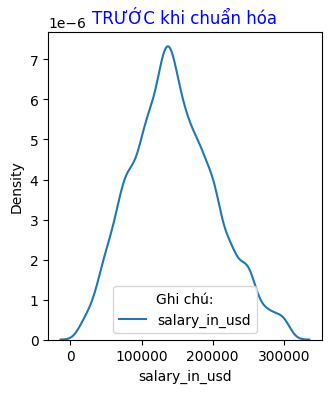

In [ ]:
# Biểu đồ salary_in_usd
fig = plt.figure(figsize = ([12, 4]))
plt.subplot(1, 3, 1)
plt.title('TRƯỚC khi chuẩn hóa', color = 'b')
sns.distplot(salary['salary_in_usd'], label = 'salary_in_usd', kde = True, norm_hist = True, hist = False)
plt.legend(title = 'Ghi chú:')
plt.show()

In [ ]:
## Scaling the dataset: x_mms = (x-x_min)/(x_max - x_min)
mms = MinMaxScaler()
mms.fit(salary)
data_mms = mms.transform(salary)
data_mms = pd.DataFrame(data_mms, columns = ['salary'])
data_mms.head()

,salary
0,0.674427
1,0.599110
2,0.096077
3,0.096077
4,0.789798


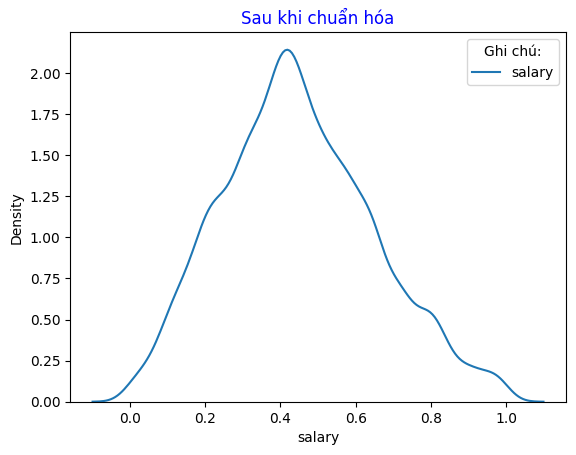

In [ ]:
plt.title('Sau khi chuẩn hóa', color = 'b')
sns.distplot(data_mms['salary'], label = 'salary', kde = True, norm_hist = True, hist = False)
plt.legend(title = 'Ghi chú:')
plt.show()

In [ ]:
job_title_df.reset_index(inplace=True)
job_title_df

,index,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Other
0,0,0,0,1,0,0
1,1,0,0,1,0,0
2,2,0,0,0,0,1
3,3,0,0,0,0,1
4,4,0,0,0,1,0
...,...,...,...,...,...,...
8641,8641,0,0,0,0,1
8642,8642,0,0,1,0,0
8643,8643,0,0,1,0,0
8644,8644,1,0,0,0,0


In [ ]:
# Xuất file kết quả cho mô hình hồi quy
df_clean_2  = pd.concat([data_mms, job_title_df, df_clean], axis = 1)
df_clean_2.to_csv('/content/salary_clean_2.csv')
df_clean_2

,salary,index,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Other,index,work_year,salary_in_usd,remote_ratio_clean,job_title_clean,company_location_clean,company_size_clean,experience_level_clean
0,0.674427,0,0,0,1,0,0,0,2023,212000,0,2,1,2,4
1,0.599110,1,0,0,1,0,0,1,2023,190000,0,2,1,2,4
2,0.096077,2,0,0,0,0,1,2,2023,43064,0,4,0,2,2
3,0.096077,3,0,0,0,0,1,3,2023,43064,0,4,0,2,2
4,0.789798,4,0,0,0,1,0,4,2023,245700,0,3,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8641,0.513523,8641,0,0,0,0,1,8799,2021,165000,100,4,1,3,3
8642,0.465594,8642,0,0,1,0,0,8801,2021,151000,100,2,1,3,2
8643,0.308114,8643,0,0,1,0,0,8802,2020,105000,100,2,1,1,1
8644,0.290996,8644,1,0,0,0,0,8803,2020,100000,100,0,1,3,1


# Chương 4. Xây dựng mô hình dự đoán

## I. Các mô hình dự đoán

### 1. Mô hình hồi quy tuyến tính



In [ ]:
df_clean_2['work_year'] = df_clean_2['work_year'].astype('int64')

In [ ]:
#Tạo mô hình hồi quy tuyến tính
linear_regression = linear_model.LinearRegression()
linear_regression.fit(df_clean_2[['work_year',
                          'experience_level_clean',
                          'company_size_clean',
                          'remote_ratio_clean',
                          'job_title_clean',
                          'company_location_clean']],
                      df_clean_2['salary_in_usd'])

LinearRegression()

In [ ]:
# w = [w1, w2, w3, ... wn]
w = linear_regression.coef_
# b = intercpet
b = linear_regression.intercept_
w, b

In [ ]:
#OLS
X = sm.add_constant(df_clean_2[['work_year', 'experience_level_clean','company_size_clean','remote_ratio_clean','job_title_clean','company_location_clean']])
results = sm.OLS(df_clean_2['salary_in_usd'], X).fit()

print(results.summary())

In [ ]:
## Xem giá trị p-value của biến nào thấp hơn 0.05
summary = results.summary()
summary_df = pd.read_html(summary.tables[1].as_html(), header=0, index_col=0)[0]
significant_vars = summary_df[summary_df['P>|t|'] < 0.05]

print("Các biến có p-value thấp hơn 0.05:")
print(significant_vars)

In [ ]:
independent_vars = results.params.index[1:]
absolute_coeffs = abs(results.params.values[1:])
max_coeff_variable = independent_vars[absolute_coeffs.argmax()]

max_coeff_value = results.params[results.params.index == max_coeff_variable].values[0]

print("Biến có trị tuyệt đối của hệ số chặn lớn nhất:", max_coeff_variable)
print("Giá trị của hệ số tương ứng:", max_coeff_value)

### 2. Mô hình cây quyết định

In [ ]:
df_clean

,index,work_year,salary_in_usd,remote_ratio_clean,job_title_clean,company_location_clean,company_size_clean,experience_level_clean
0,0,2023,212000,0,2,1,2,4
1,1,2023,190000,0,2,1,2,4
2,2,2023,43064,0,4,0,2,2
3,3,2023,43064,0,4,0,2,2
4,4,2023,245700,0,3,1,2,3
...,...,...,...,...,...,...,...,...
8641,8799,2021,165000,100,4,1,3,3
8642,8801,2021,151000,100,2,1,3,2
8643,8802,2020,105000,100,2,1,1,1
8644,8803,2020,100000,100,0,1,3,1


In [ ]:
# Tạo mô hình decision tree
decision_tree = DecisionTreeRegressor()
decision_tree.fit(df_clean[['work_year',
                        'experience_level_clean',
                        'company_size_clean',
                        'remote_ratio_clean',
                        'job_title_clean',
                        'company_location_clean']],
                  df_clean['salary_in_usd'])

DecisionTreeRegressor()

In [ ]:
importance = decision_tree.feature_importances_
feature_names = ['work_year',
                  'experience_level_clean',
                  'company_size_clean',
                  'remote_ratio_clean',
                  'job_title_clean',
                  'company_location_clean']
feature_importance = pd.DataFrame({'Biến': feature_names, 'Độ quan trọng': importance})
feature_importance.sort_values(by='Độ quan trọng', ascending=False, inplace=True)
print("Độ quan trọng của các biến:")
print(feature_importance)

### 3. Mô hình rừng ngẫu nhiên

In [ ]:
#Tạo mô hình rừng ngẫu nhiên
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(df_clean[['work_year',
                 'experience_level_clean',
                 'company_size_clean',
                 'remote_ratio_clean',
                 'job_title_clean',
                 'company_location_clean']],
             df_clean['salary_in_usd'])

RandomForestRegressor(random_state=42)

In [ ]:
importance = rf_model.feature_importances_
feature_names = ['work_year',
                 'experience_level_clean',
                 'company_size_clean',
                 'remote_ratio_clean',
                 'job_title_clean',
                 'company_location_clean']
feature_importance = pd.DataFrame({'Biến': feature_names, 'Độ quan trọng': importance})
feature_importance.sort_values(by='Độ quan trọng', ascending=False, inplace=True)
print("Độ quan trọng của các biến:")
print(feature_importance)




















## II. Đánh giá mô hình

In [ ]:
#Đánh giá mô hình cây quyết định và mô hình rừng ngẫu nhiên
X_train, X_test, y_train, y_test = train_test_split(df_clean[['work_year',
                                                        'experience_level_clean',
                                                        'company_size_clean',
                                                        'remote_ratio_clean',
                                                        'job_title_clean',
                                                        'company_location_clean']],
                                                    df_clean['salary_in_usd'],
                                                    test_size=0.2, random_state=42)

# Decision Tree
decision_tree_model = DecisionTreeRegressor()
decision_tree_model.fit(X_train, y_train)
decision_tree_pred = decision_tree_model.predict(X_test)

# Random Forest
random_forest_model = RandomForestRegressor()
random_forest_model.fit(X_train, y_train)
random_forest_pred = random_forest_model.predict(X_test)

# Đánh giá Decision Tree
decision_tree_mse = mean_squared_error(y_test, decision_tree_pred)
decision_tree_r2 = r2_score(y_test, decision_tree_pred)
decision_tree_mae = mean_absolute_error(y_test, decision_tree_pred)
decision_tree_percentage_error = np.mean(np.abs((y_test - decision_tree_pred) / y_test)) * 100
print('\nĐánh giá mô hình Decision Tree:')
print(f'Decision Tree MSE: {decision_tree_mse}')
print(f'Decision Tree R^2: {decision_tree_r2}')
print(f'Mean Absolute Error: {decision_tree_mae}')
print(f'Percentage Error: {decision_tree_percentage_error}%')

# Đánh giá Random Forest
random_forest_mse = mean_squared_error(y_test, random_forest_pred)
random_forest_r2 = r2_score(y_test, random_forest_pred)
random_forest_mae = mean_absolute_error(y_test, random_forest_pred)
random_forest_percentage_error = np.mean(np.abs((y_test - random_forest_pred) / y_test)) * 100
print('\nĐánh giá mô hình Random Forest:')
print(f'Random Forest MSE: {random_forest_mse}')
print(f'Random Forest R^2: {random_forest_r2}')
print(f'Mean Absolute Error: {random_forest_mae}')
print(f'Percentage Error: {random_forest_percentage_error}%')

In [ ]:
#Đánh giá mô hình hồi quy tuyến tính
X_train2, X_test2, y_train2, y_test2 = train_test_split(df_clean_2[['work_year',
                                                        'experience_level_clean',
                                                        'company_size_clean',
                                                        'remote_ratio_clean',
                                                        'job_title_clean',
                                                        'company_location_clean']],
                                                    df_clean_2['salary_in_usd'],
                                                    test_size=0.2, random_state=42)

# Linear Regression
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train2, y_train2)
linear_reg_pred = linear_reg_model.predict(X_test)
# Đánh giá Linear Regression
linear_reg_mse = mean_squared_error(y_test, linear_reg_pred)
linear_reg_r2 = r2_score(y_test2, linear_reg_pred)
linear_reg_mae = mean_absolute_error(y_test2, linear_reg_pred)
linear_reg_percentage_error = np.mean(np.abs((y_test2 - linear_reg_pred) / y_test2)) * 100
print('Đánh giá mô hình Linear Regression:')
print(f'Linear Regression MSE: {linear_reg_mse}')
print(f'Linear Regression R^2: {linear_reg_r2}')
print(f'Mean Absolute Error: {linear_reg_mae}')
print(f'Percentage Error: {linear_reg_percentage_error}%')
